<a href="https://colab.research.google.com/github/skywalker0803r/CFB/blob/main/%E6%95%B8%E6%93%9A%E5%89%8D%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#確認預測目標變數：
#第一段脫硫效率（Y₁）
#第二段脫硫效率（Y₂）
#煙囪排放 SOx 濃度（Y₃）



In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/脫硫劑優化改善/20240916-CFB2脫硫劑優化改善.xlsx')

import numpy as np
def preprocess_df(df):
  # 索引處理
  df = df.set_index('Unnamed: 0')
  df.index.name = 'datetime'
  # 欄位處理
  df = df.iloc[1:,:]
  # 轉數值
  for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')
  # 處理無限大
  df = df.replace([np.inf, -np.inf], np.nan)
  return df

df_preprocessed = preprocess_df(df)
df_preprocessed

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MLUT4_AIA792101A,MLUT4_AIA792101B,MLUT4_AIC-232B,MLUT4_AT-232A,MLUT4_AT-237,MLUT4_AT-240,MLUT4_AT-240A,MLUT4_FIC-231A,MLUT4_FIC-231B,MLUT4_FIC-231C,...,MLUT4_TE-252F,MLUT4_TE-252G,MLUT4_TE-252H,MLUT4_TE-252I,MLUT4_ZT-231,MLUT4_ZT-232,DeSOx_1st,DeSOx_2nd,前爐SOx濃度,鈣硫比
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,5.540932,6.800000,67.034424,151.208024,9.623605,8.619934,8.619934,20.605973,0.000000,17.456094,...,876.984866,845.297084,845.703201,876.997523,59.200001,15.000000,0.969941,0.871410,2230.093232,2.223152
2024-01-01 00:05:00,5.533478,6.800000,66.662524,150.811453,9.616252,8.147002,8.147002,20.181020,0.000000,17.449118,...,875.326466,846.587071,844.102850,877.381060,59.200001,15.000000,0.969979,0.877787,2220.527929,2.220789
2024-01-01 00:10:00,5.526025,6.800000,64.320729,151.708113,9.608899,8.247992,8.247992,20.200619,0.000000,17.442142,...,875.675699,845.374599,843.500123,877.897600,59.200001,15.000000,0.971249,0.871768,2237.129686,2.217612
2024-01-01 00:15:00,5.518571,6.801543,64.840762,151.283528,9.600898,7.605820,7.605820,20.220218,0.000000,17.571883,...,875.435828,845.100450,842.910508,874.888616,59.200001,15.000000,0.970896,0.882700,2227.895501,2.214444
2024-01-01 00:20:00,5.511117,6.819977,64.390831,150.994896,9.581994,6.110485,6.110485,20.549012,0.000000,17.339679,...,875.245400,846.058978,844.200021,878.416710,59.200001,15.000000,0.970878,0.905103,2211.052236,2.211285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.258452,5.140339,114.166438,209.520746,9.360355,13.105704,13.105704,12.795748,11.854892,12.842200,...,916.635699,889.885541,906.016252,870.865216,100.000000,26.103367,0.945172,0.885205,2082.274527,3.928554
2024-09-15 23:40:00,6.284992,5.166336,106.669841,208.177318,9.280099,9.903673,9.903673,12.797045,11.862273,12.823741,...,914.065610,889.042164,904.255862,869.007829,100.000000,26.093265,0.948517,0.907156,2071.948976,3.927730
2024-09-15 23:45:00,6.232171,5.225976,104.663595,211.564232,9.359701,9.345572,9.345572,12.798342,11.880556,12.842696,...,913.978871,890.439554,903.442876,867.712970,100.000000,26.100000,0.949882,0.910708,2088.339754,3.928170


In [4]:
y_col = ['DeSOx_1st','DeSOx_2nd','MLUT4_AT-240','MLUT4_AT-240A']
x_col = df_preprocessed.columns.difference(y_col)

# 缺失值補值

In [5]:
import pandas as pd

def missing_value_summary(df):
    missing_count = df.isnull().sum()
    missing_percent = df.isnull().mean() * 100  # 乘 100 轉換為百分比

    summary_df = pd.DataFrame({
        '欄位名稱': missing_count.index,
        '缺失數': missing_count.values,
        '缺失百分比': missing_percent.values
    })

    # 只顯示有缺失值的欄位，並依照缺失百分比由高到低排序
    summary_df = summary_df[summary_df['缺失數'] > 0]
    summary_df = summary_df.sort_values(by='缺失百分比', ascending=False).reset_index(drop=True)

    return summary_df
missing_value_summary(df_preprocessed)

,欄位名稱,缺失數,缺失百分比
0,MLUT4_SIV-B7921,67848,90.958816
1,DeSOx_1st,19131,25.647523
2,鈣硫比,18923,25.368672
3,前爐SOx濃度,18262,24.482518
4,DeSOx_2nd,16590,22.240991
5,MLUT4_AIA792101B,2,0.002681
6,MLUT4_AT-232A,2,0.002681
7,MLUT4_AT-237,2,0.002681
8,MLUT4_AIA792101A,2,0.002681
9,MLUT4_FIC-233,2,0.002681


--2025-04-22 14:22:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.141.100, 74.125.141.113, 74.125.141.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-22 14:22:04--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-22 14:2

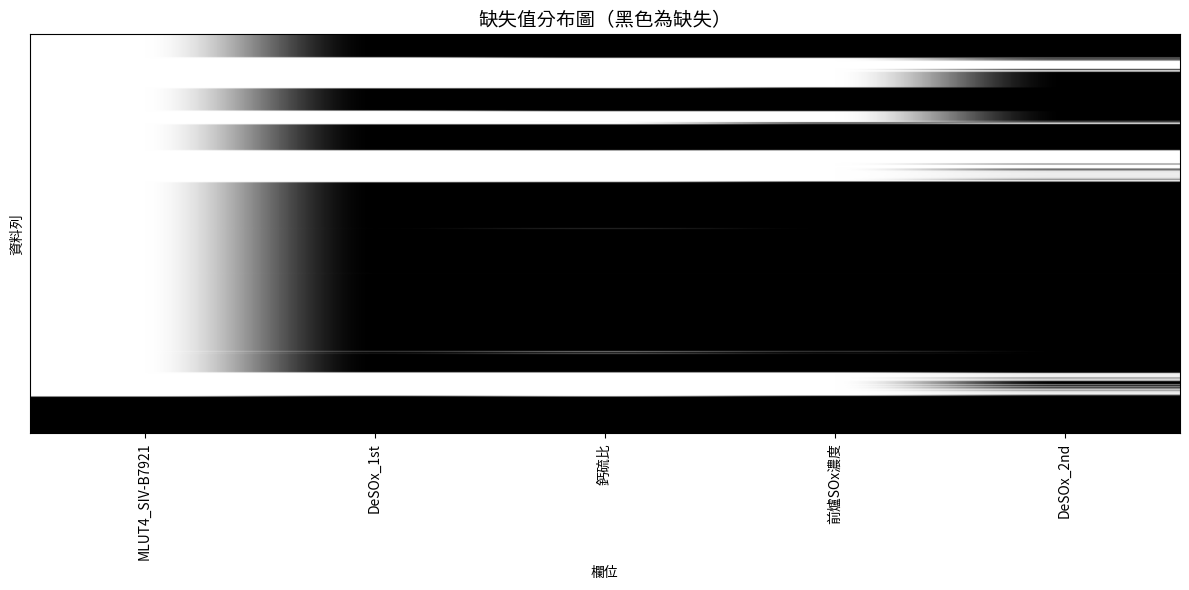

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

def plot_missing_matrix_matplotlib(df):
    # 建立布林矩陣：True 表示缺失，False 表示有值
    missing_mask = df.isnull().values

    plt.figure(figsize=(12, 6))
    plt.imshow(missing_mask, aspect='auto', cmap='gray')  # 灰階：True → 黑, False → 白
    plt.title('缺失值分布圖（黑色為缺失）', fontsize=14)
    plt.xlabel('欄位')
    plt.ylabel('資料列')
    plt.xticks(ticks=np.arange(df.shape[1]), labels=df.columns, rotation=90)
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    plt.show()
plot_missing_matrix_matplotlib(df[missing_value_summary(df_preprocessed).head(5)['欄位名稱'].tolist()])

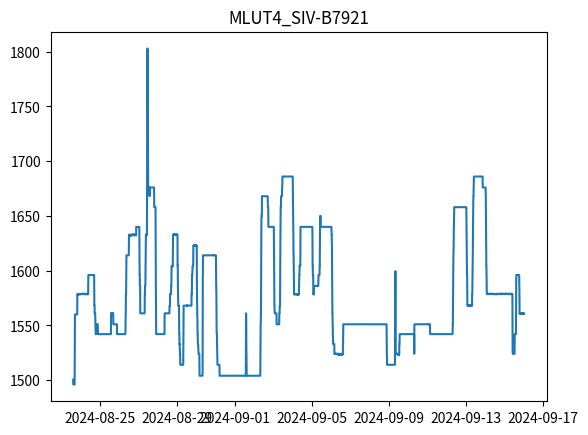

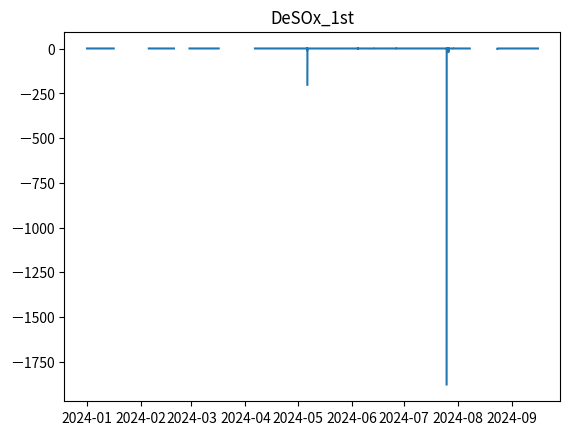

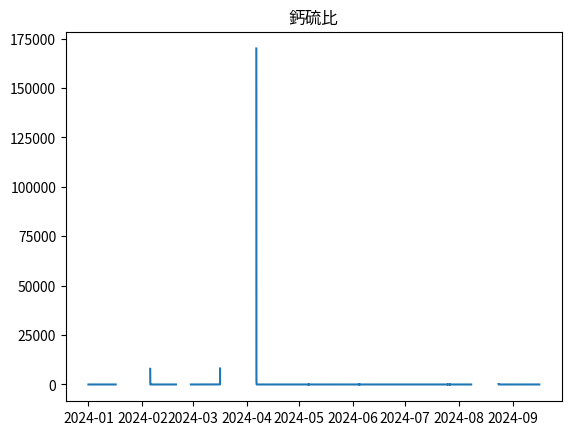

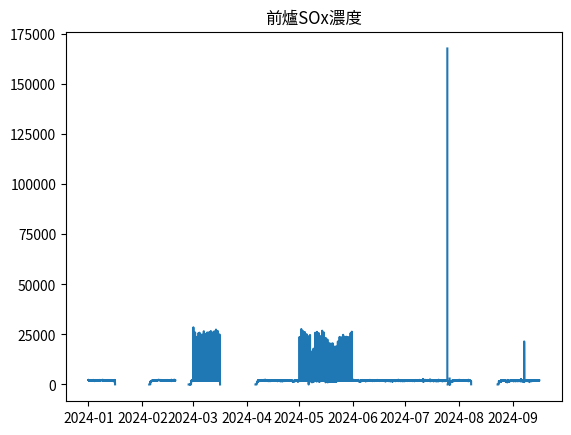

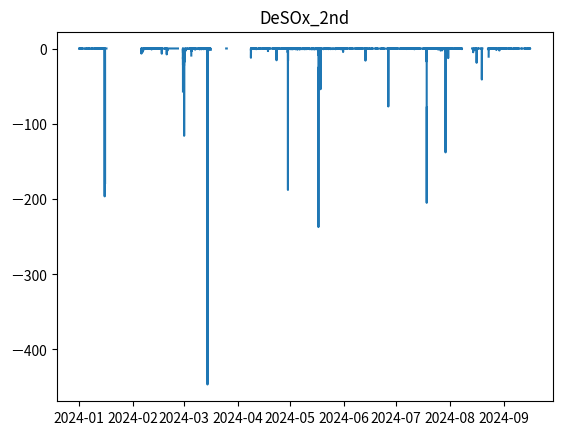

In [10]:
top_five_miss_col = missing_value_summary(df_preprocessed).head(5)['欄位名稱'].tolist()
for i in df_preprocessed[top_five_miss_col]:
  plt.plot(df_preprocessed.index,df_preprocessed[i])
  plt.title(i)
  plt.show()

In [11]:
import pandas as pd

def interpolate_df(df, method='linear', columns=None, limit_direction='both'):
    """
    對 DataFrame 中的缺失值進行插值補值。

    參數:
    - df: 要補值的 DataFrame。
    - method: 插值方法，例如 'linear', 'polynomial', 'spline', 'time', 'index', 'pad', 'nearest' 等。
    - columns: 要補值的欄位清單，若為 None 則補全部數值欄。
    - limit_direction: 插值方向，'forward'、'backward' 或 'both'。

    回傳:
    - 一個補完值的新 DataFrame。
    """
    df_interp = df.copy()

    # 若未指定欄位，自動選取數值型欄位
    if columns is None:
        columns = df_interp.select_dtypes(include=['float64', 'int64']).columns

    for col in columns:
        df_interp[col] = df_interp[col].interpolate(method=method, limit_direction=limit_direction)

    return df_interp

missing_value_col = missing_value_summary(df_preprocessed)['欄位名稱'].tolist()
df_interp = interpolate_df(df_preprocessed,columns=missing_value_col)
df_interp

,MLUT4_AIA792101A,MLUT4_AIA792101B,MLUT4_AIC-232B,MLUT4_AT-232A,MLUT4_AT-237,MLUT4_AT-240,MLUT4_AT-240A,MLUT4_FIC-231A,MLUT4_FIC-231B,MLUT4_FIC-231C,...,MLUT4_TE-252F,MLUT4_TE-252G,MLUT4_TE-252H,MLUT4_TE-252I,MLUT4_ZT-231,MLUT4_ZT-232,DeSOx_1st,DeSOx_2nd,前爐SOx濃度,鈣硫比
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,5.540932,6.800000,67.034424,151.208024,9.623605,8.619934,8.619934,20.605973,0.000000,17.456094,...,876.984866,845.297084,845.703201,876.997523,59.200001,15.000000,0.969941,0.871410,2230.093232,2.223152
2024-01-01 00:05:00,5.533478,6.800000,66.662524,150.811453,9.616252,8.147002,8.147002,20.181020,0.000000,17.449118,...,875.326466,846.587071,844.102850,877.381060,59.200001,15.000000,0.969979,0.877787,2220.527929,2.220789
2024-01-01 00:10:00,5.526025,6.800000,64.320729,151.708113,9.608899,8.247992,8.247992,20.200619,0.000000,17.442142,...,875.675699,845.374599,843.500123,877.897600,59.200001,15.000000,0.971249,0.871768,2237.129686,2.217612
2024-01-01 00:15:00,5.518571,6.801543,64.840762,151.283528,9.600898,7.605820,7.605820,20.220218,0.000000,17.571883,...,875.435828,845.100450,842.910508,874.888616,59.200001,15.000000,0.970896,0.882700,2227.895501,2.214444
2024-01-01 00:20:00,5.511117,6.819977,64.390831,150.994896,9.581994,6.110485,6.110485,20.549012,0.000000,17.339679,...,875.245400,846.058978,844.200021,878.416710,59.200001,15.000000,0.970878,0.905103,2211.052236,2.211285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.258452,5.140339,114.166438,209.520746,9.360355,13.105704,13.105704,12.795748,11.854892,12.842200,...,916.635699,889.885541,906.016252,870.865216,100.000000,26.103367,0.945172,0.885205,2082.274527,3.928554
2024-09-15 23:40:00,6.284992,5.166336,106.669841,208.177318,9.280099,9.903673,9.903673,12.797045,11.862273,12.823741,...,914.065610,889.042164,904.255862,869.007829,100.000000,26.093265,0.948517,0.907156,2071.948976,3.927730
2024-09-15 23:45:00,6.232171,5.225976,104.663595,211.564232,9.359701,9.345572,9.345572,12.798342,11.880556,12.842696,...,913.978871,890.439554,903.442876,867.712970,100.000000,26.100000,0.949882,0.910708,2088.339754,3.928170


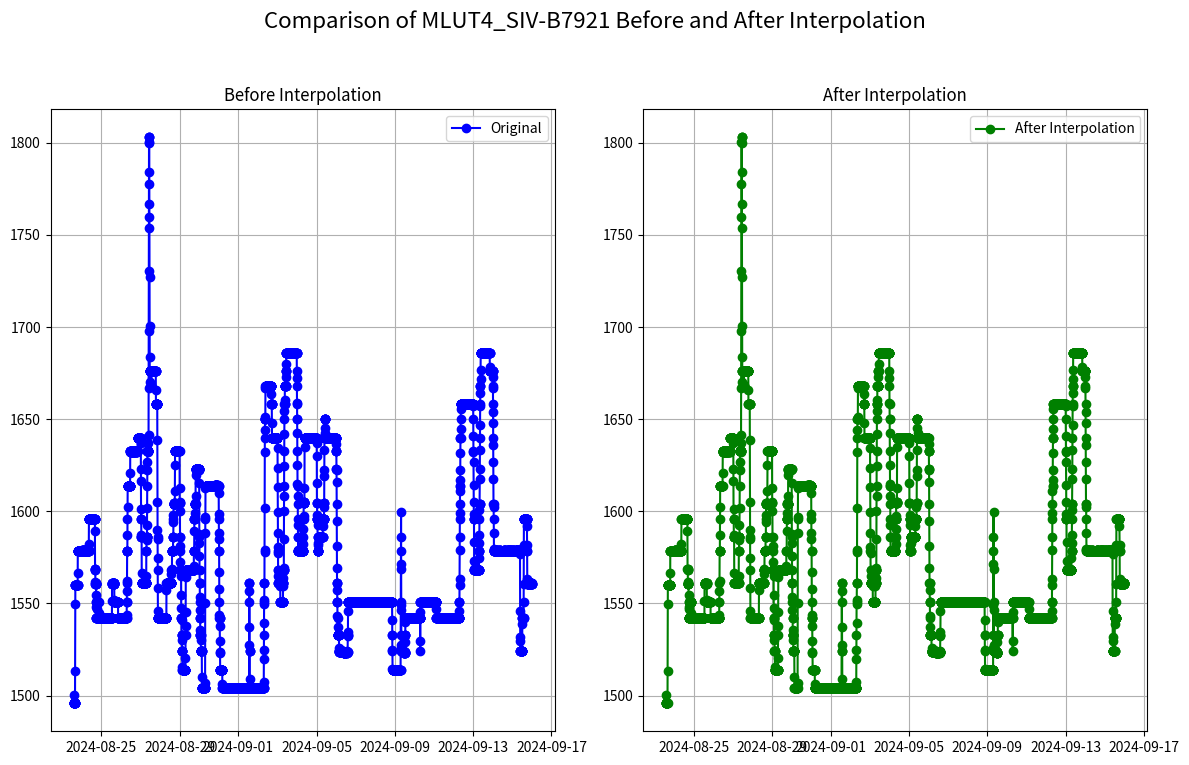

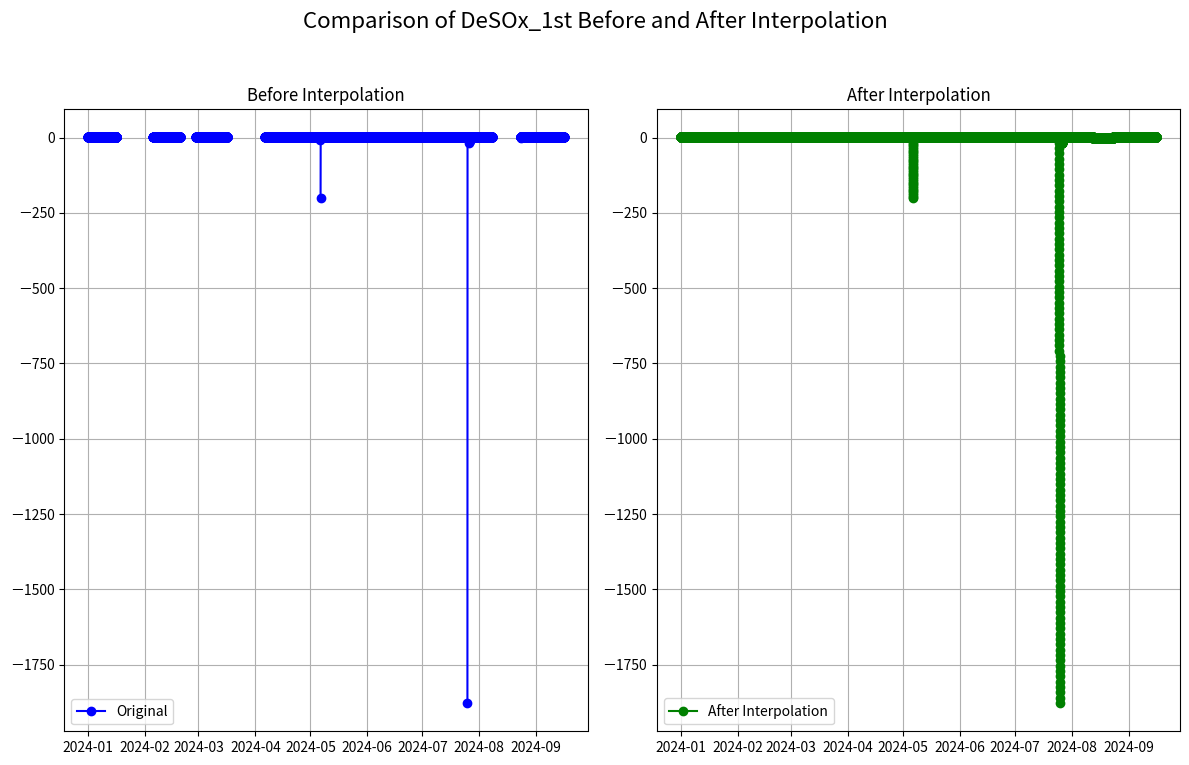

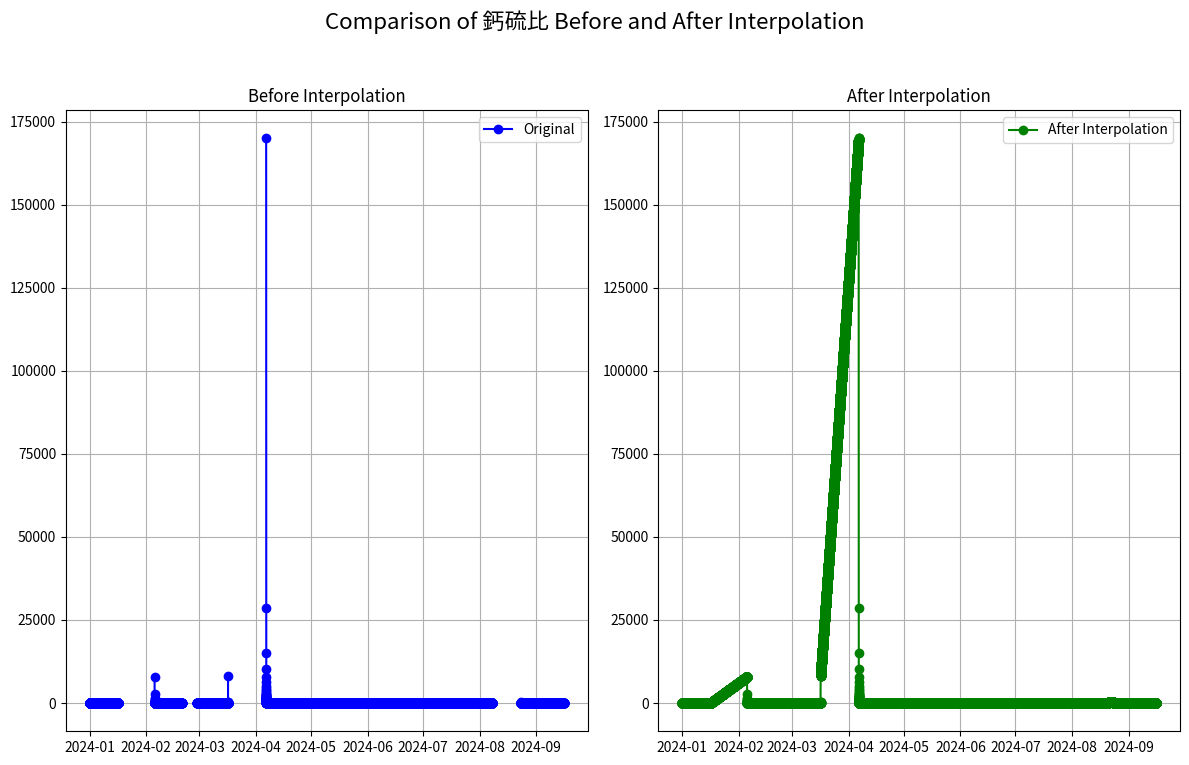

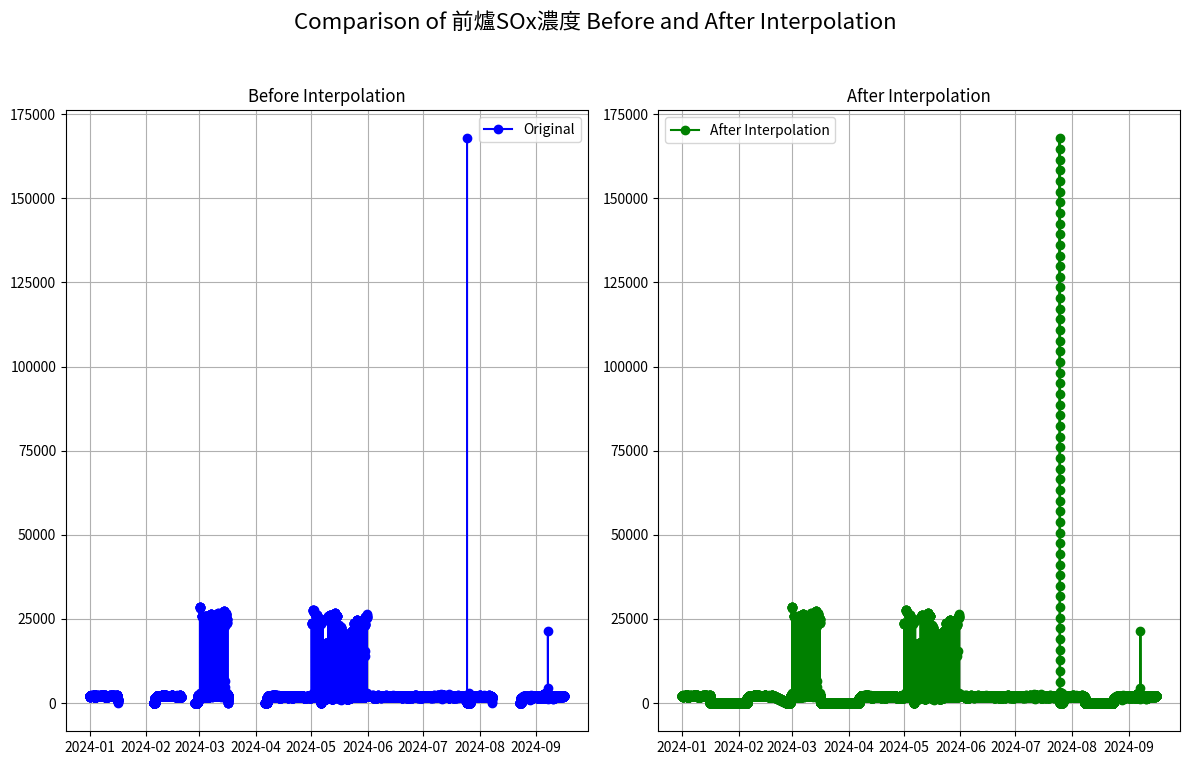

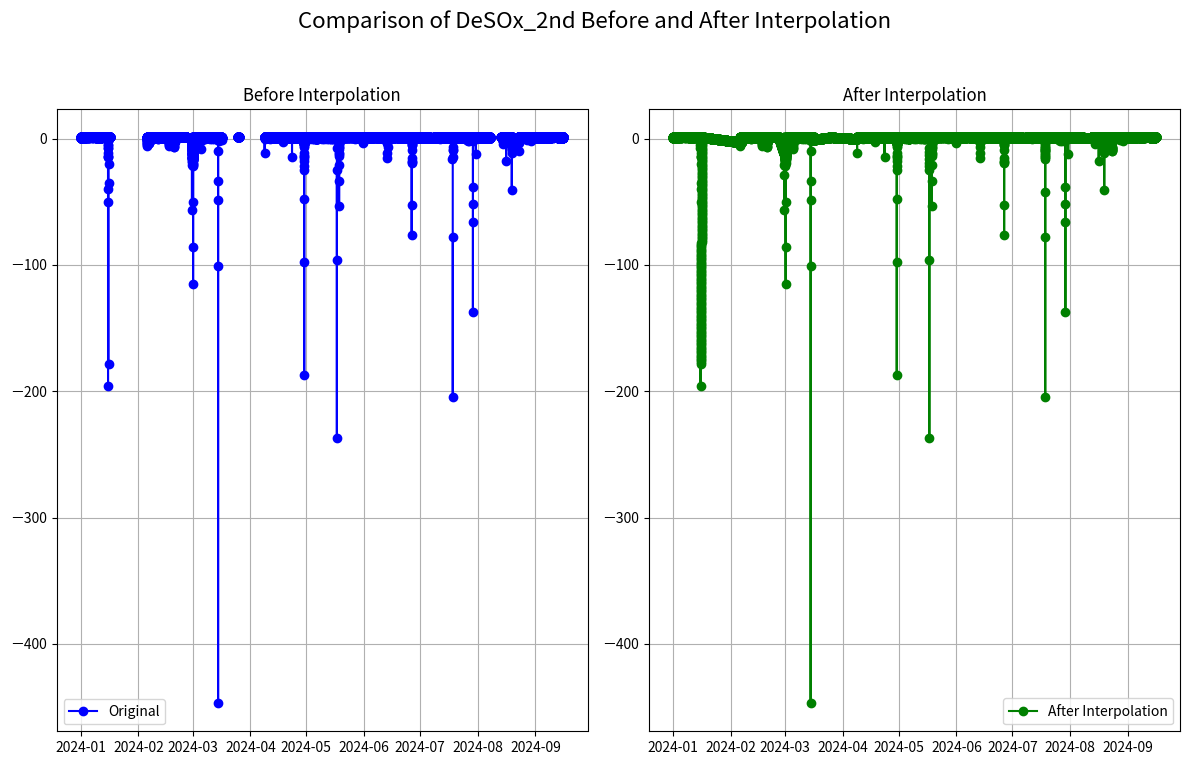

In [14]:
top_five_miss_col = missing_value_summary(df_preprocessed).head(5)['欄位名稱'].tolist()
import matplotlib.pyplot as plt

# 假設 target_column 是你要比較的欄位
for target_column in top_five_miss_col:
  # 設定圖的大小與子圖佈局
  fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)

  # 原始資料
  axes[0].plot(df_preprocessed.index, df_preprocessed[target_column], label='Original', color='blue', marker='o')
  axes[0].set_title('Before Interpolation')
  axes[0].legend()
  axes[0].grid(True)

  # 補值後資料
  axes[1].plot(df_interp.index, df_interp[target_column], label='After Interpolation', color='green', marker='o')
  axes[1].set_title('After Interpolation')
  axes[1].legend()
  axes[1].grid(True)

  # 設定整體標題與格式
  fig.suptitle(f'Comparison of {target_column} Before and After Interpolation', fontsize=16)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()


# 離群值檢測（IQR、Z-score、Isolation Forest）

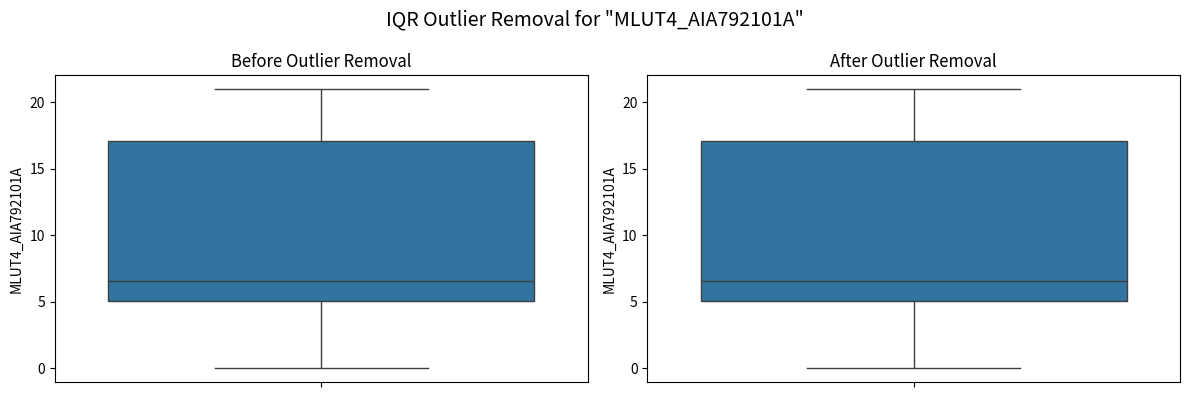

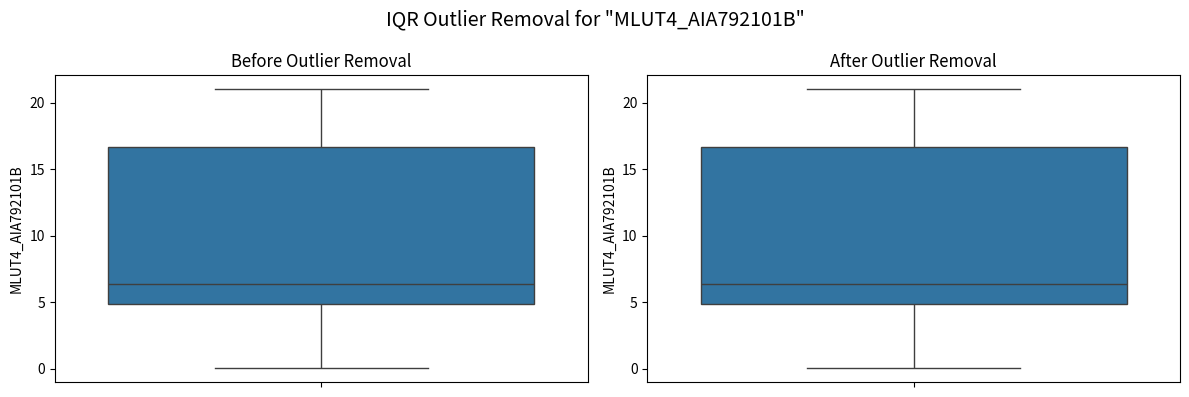

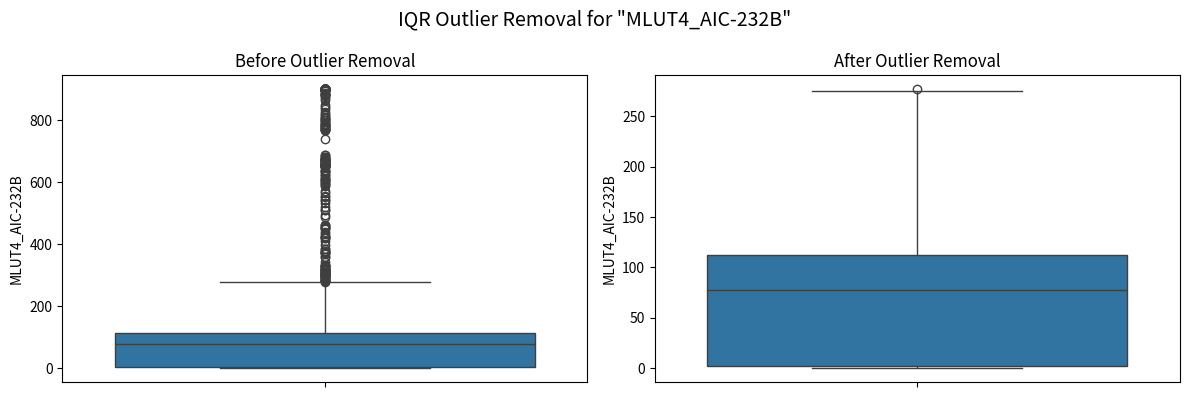

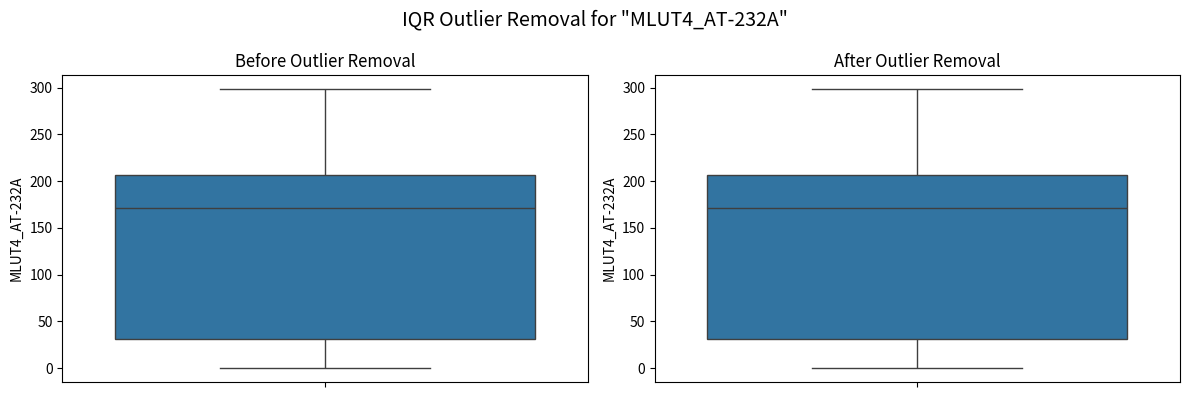

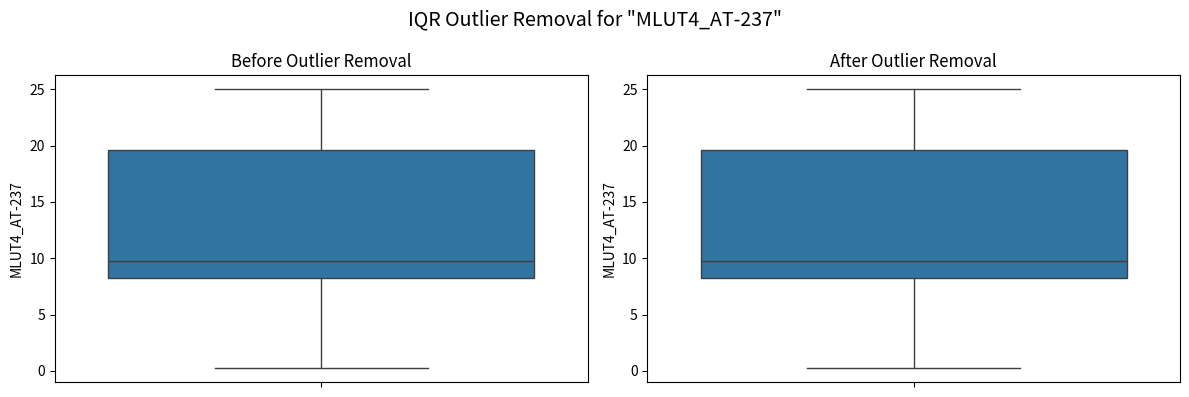

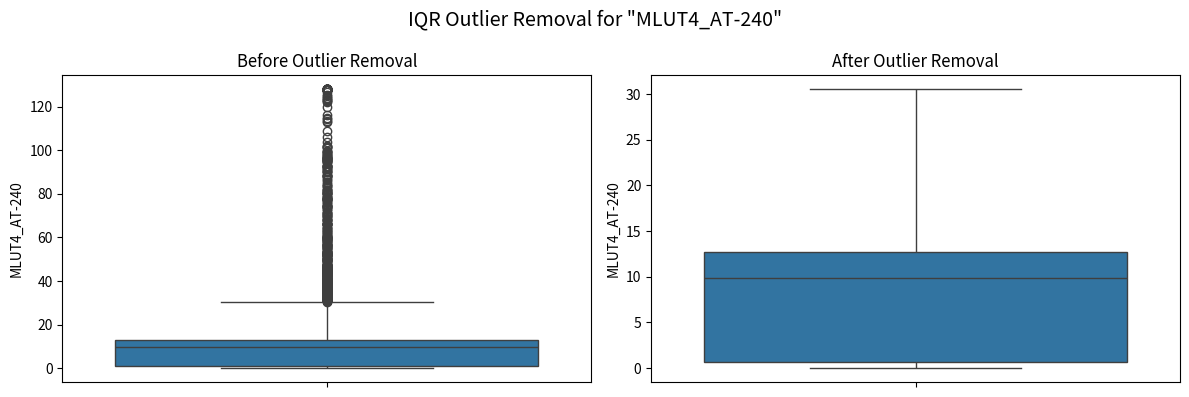

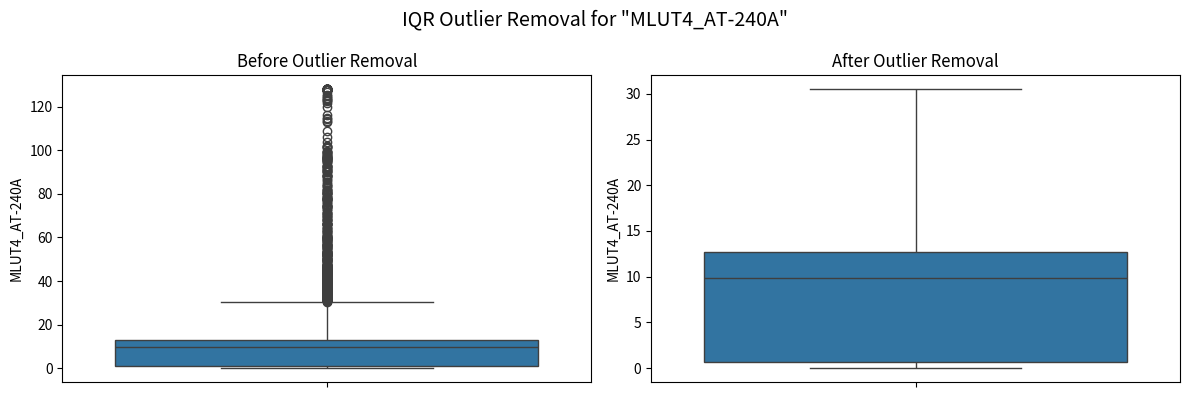

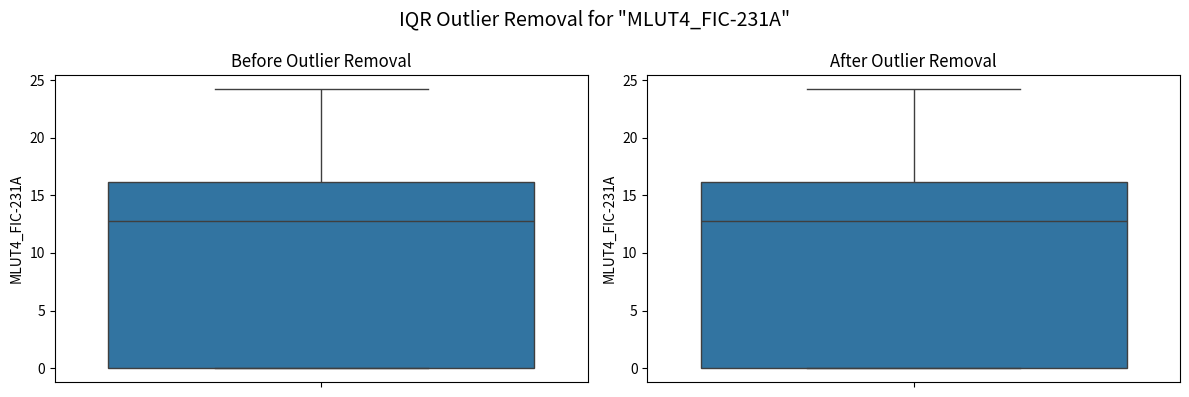

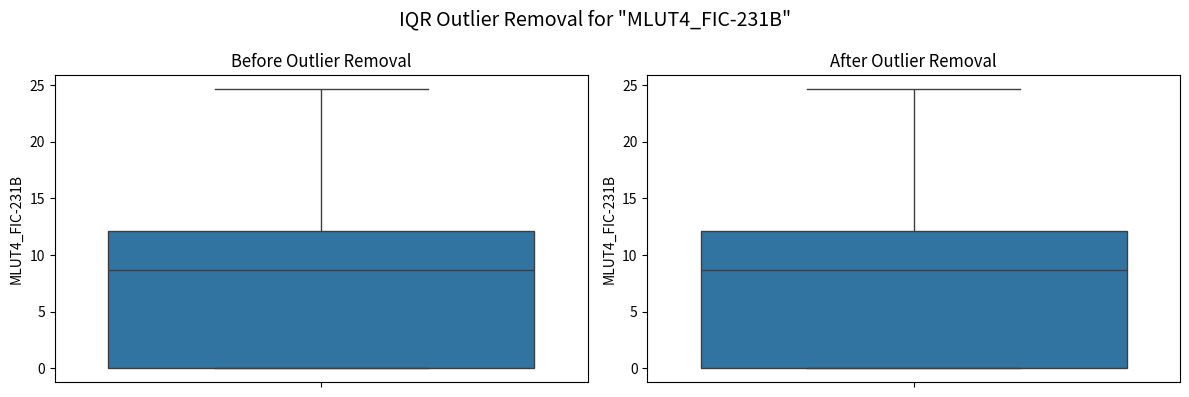

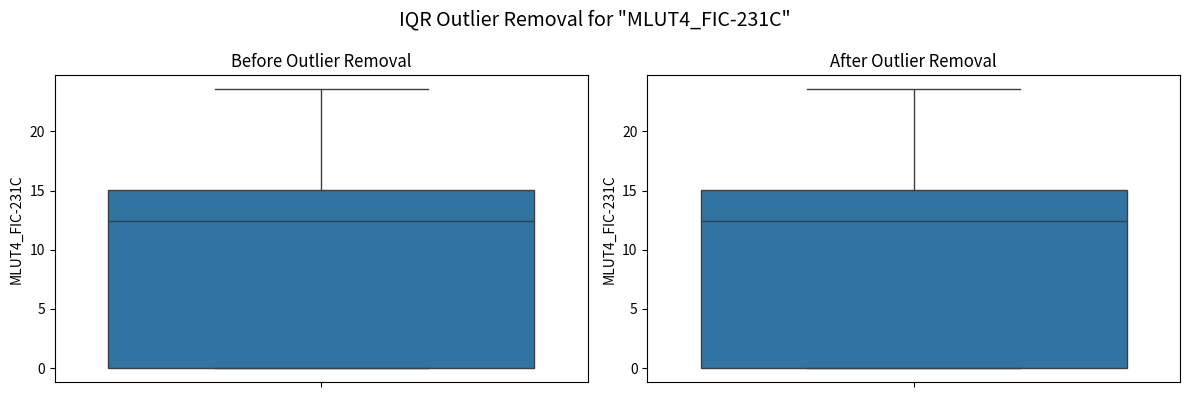

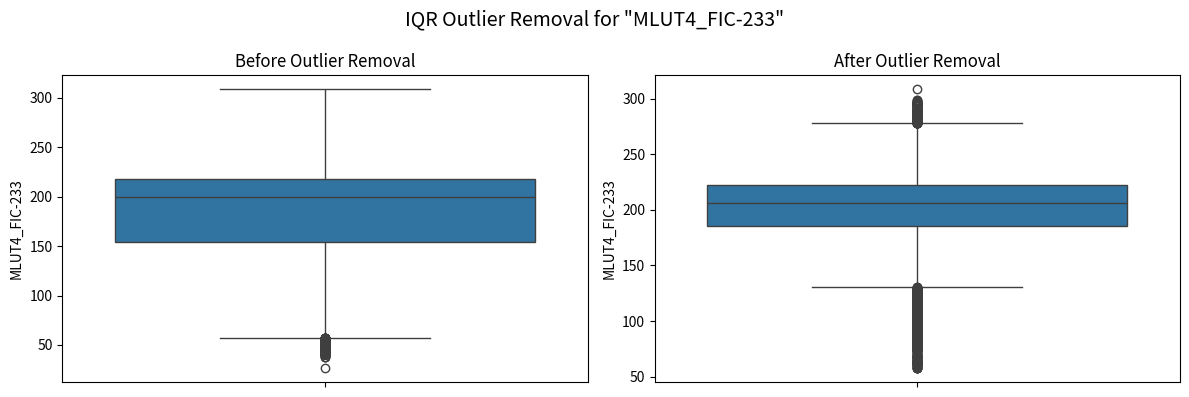

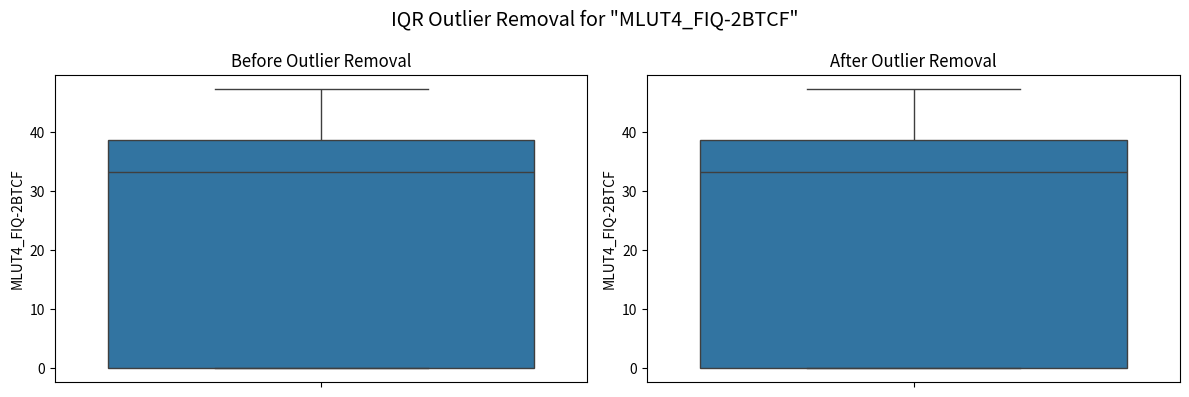

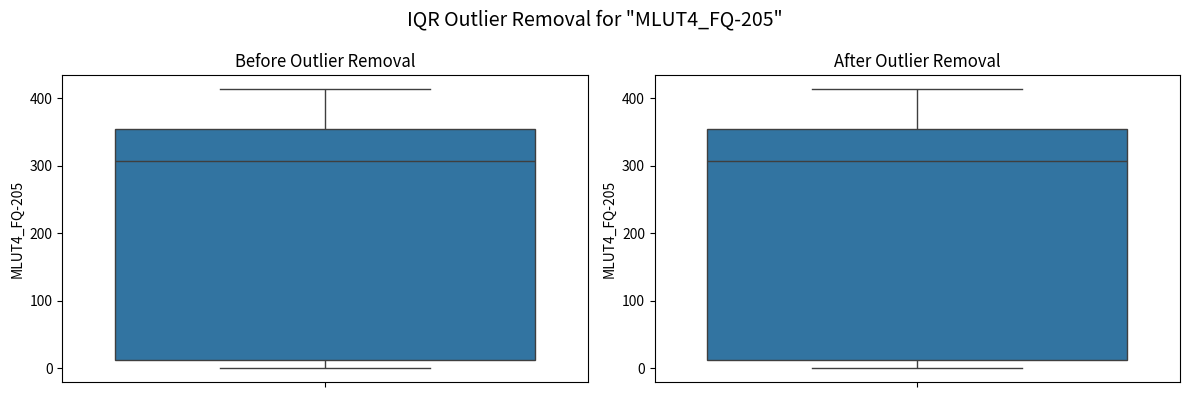

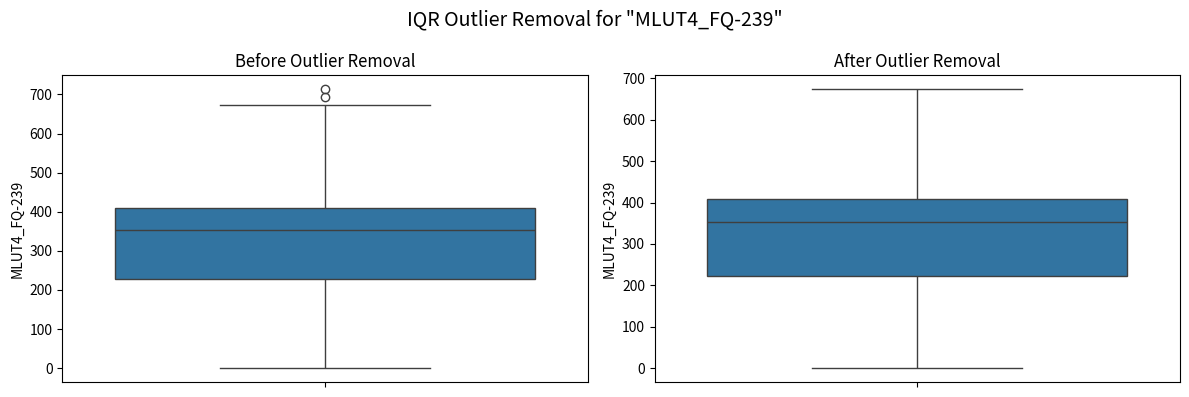

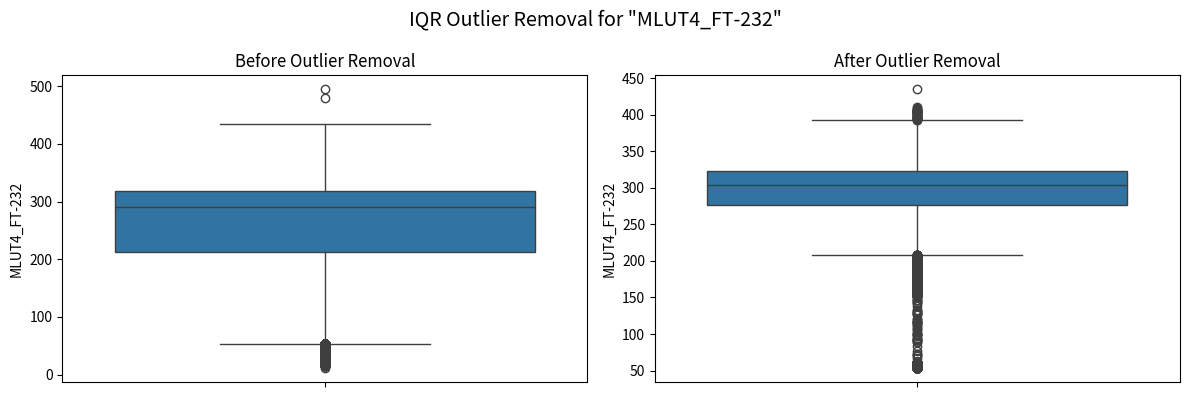

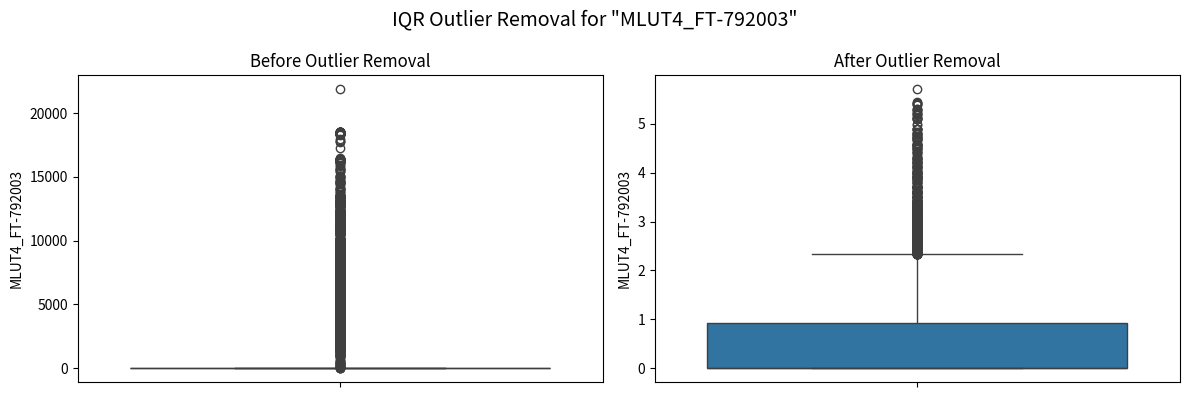

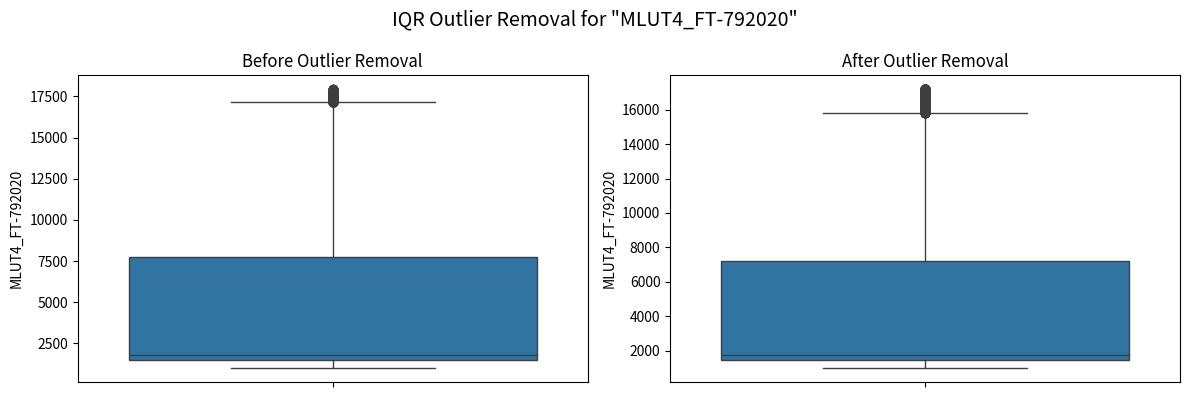

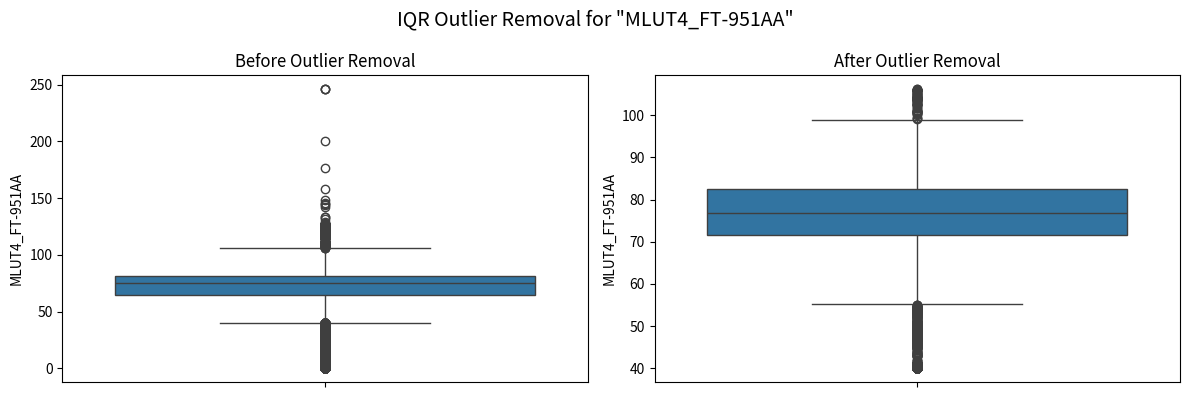

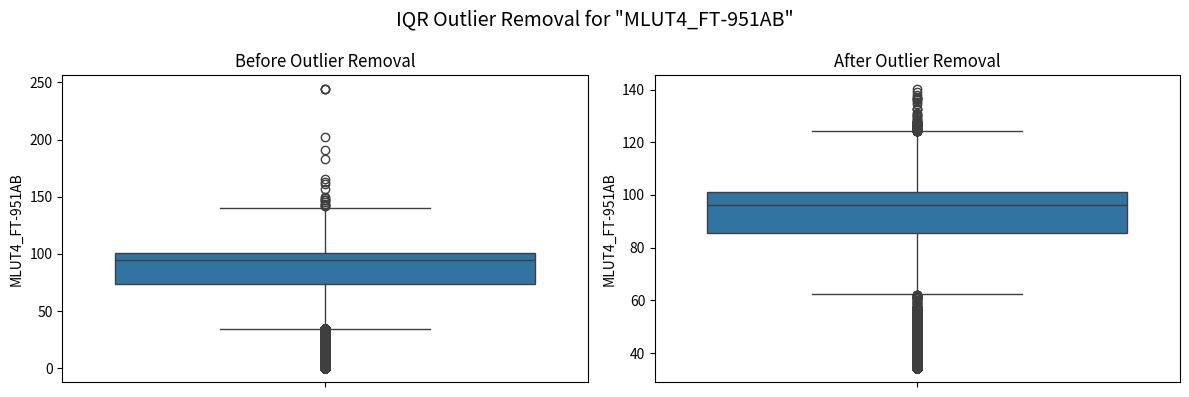

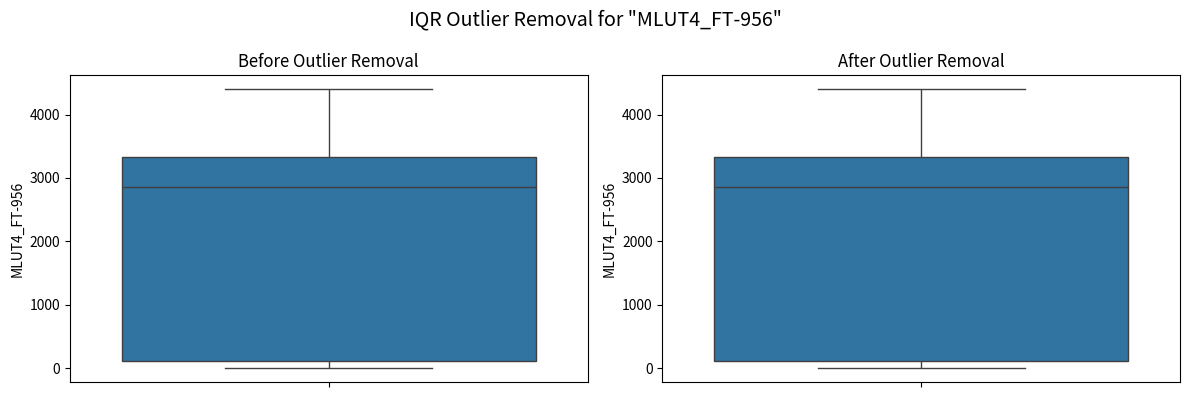

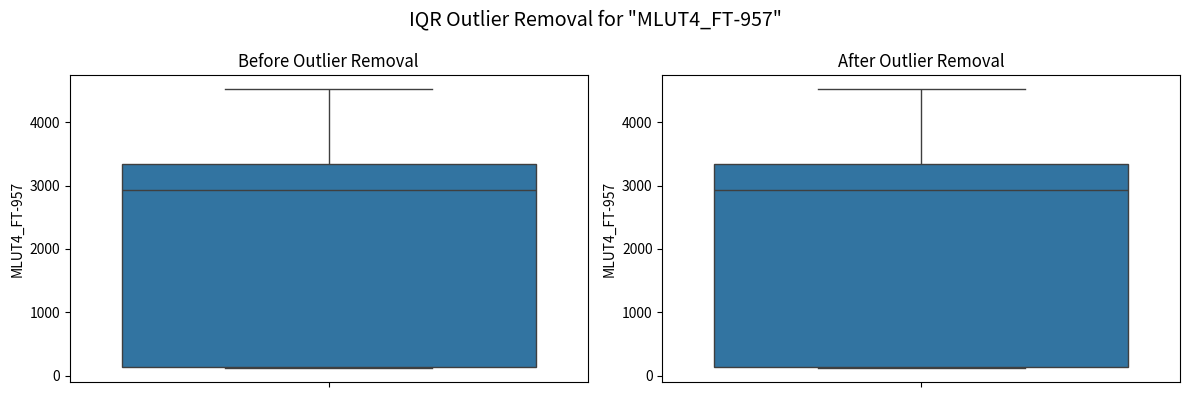

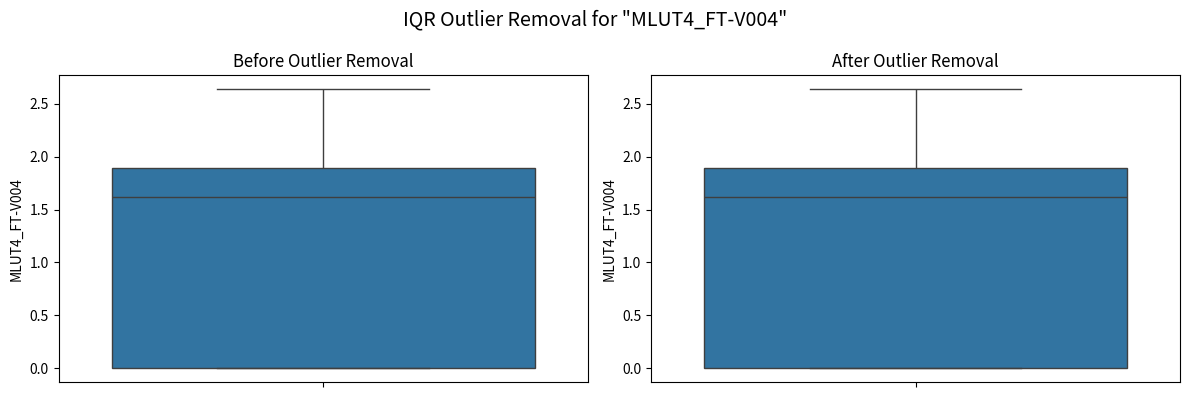

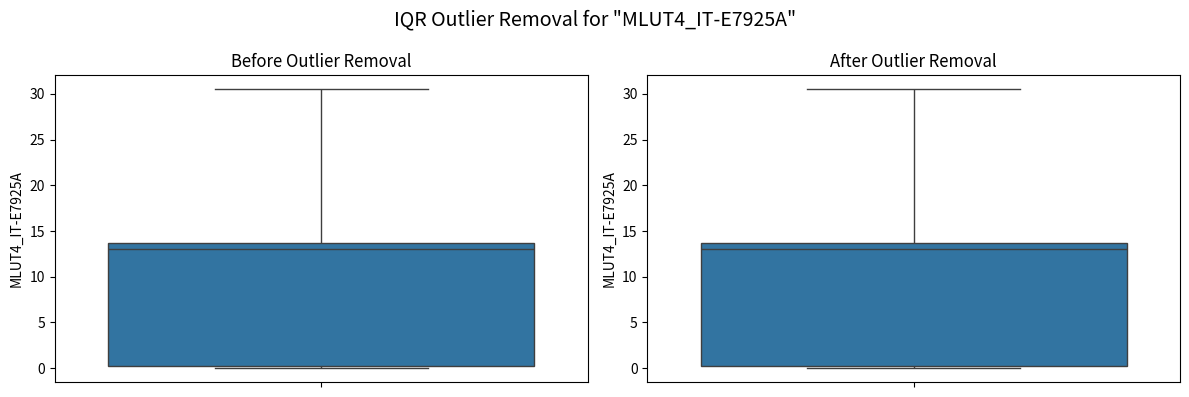

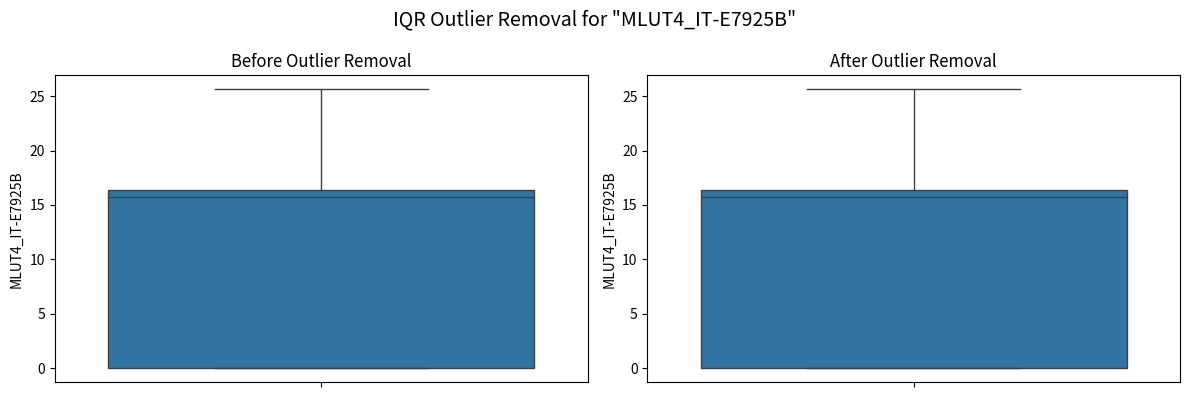

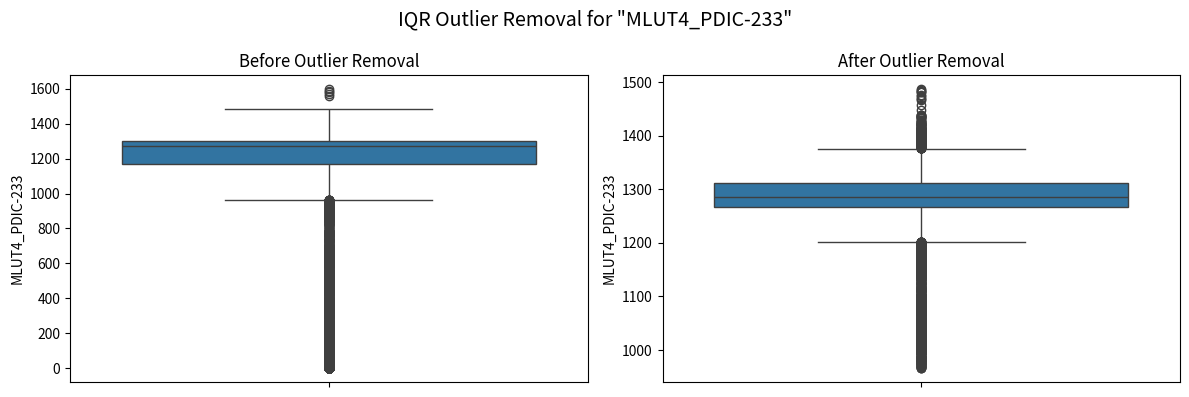

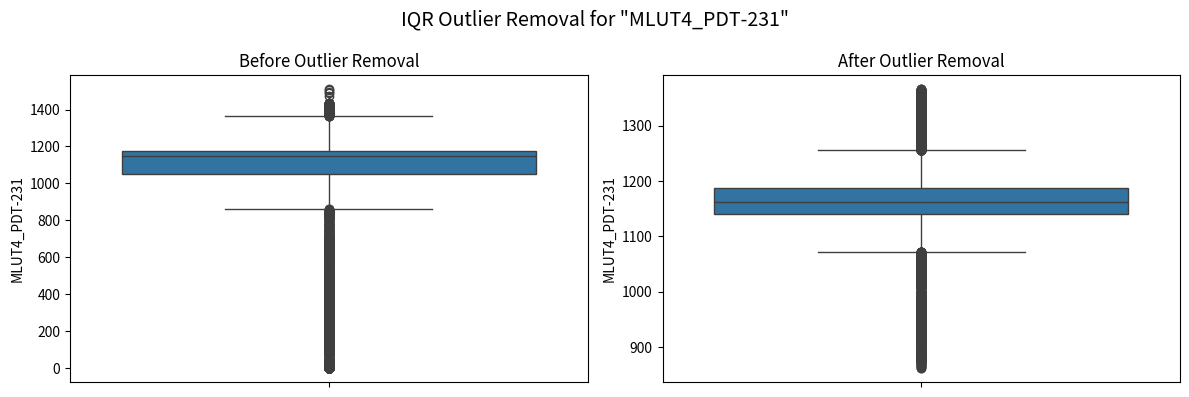

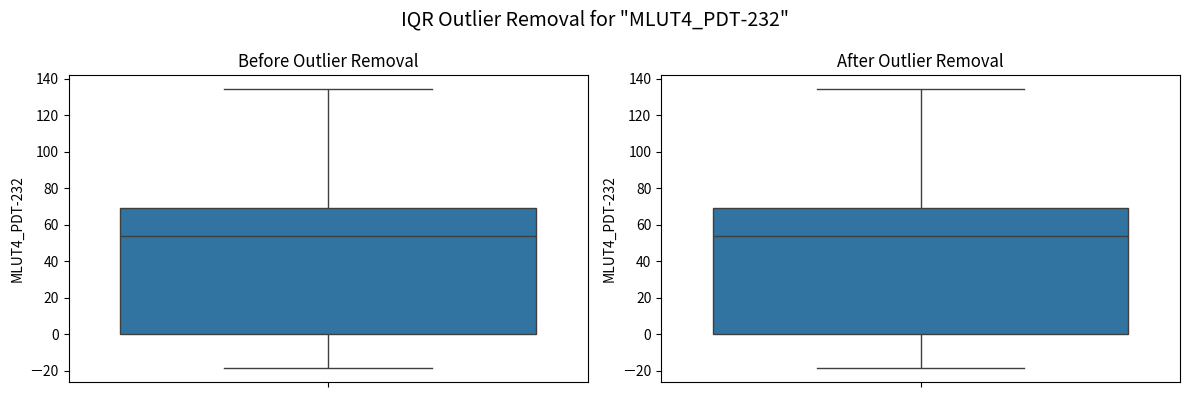

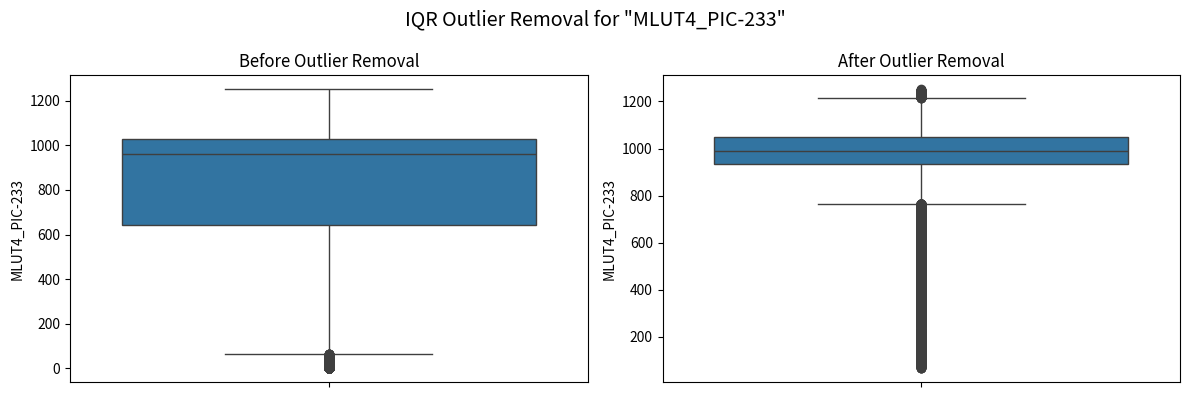

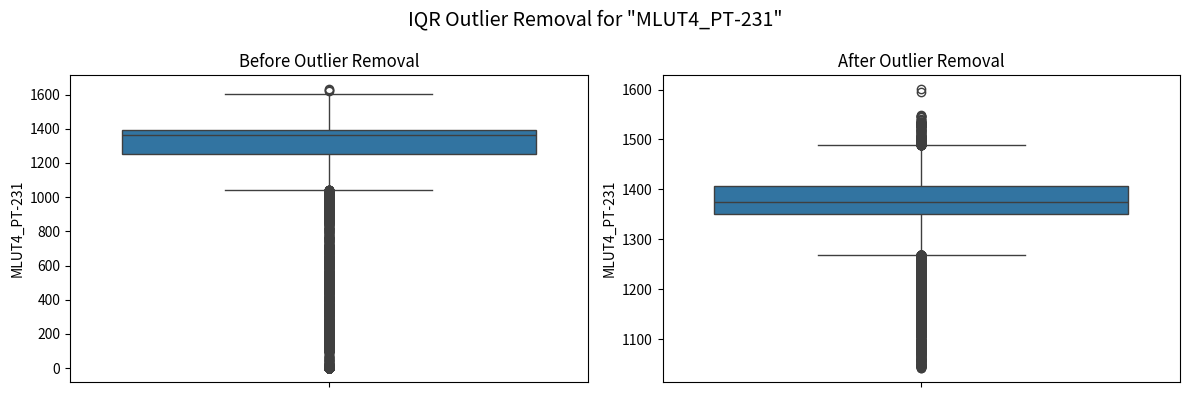

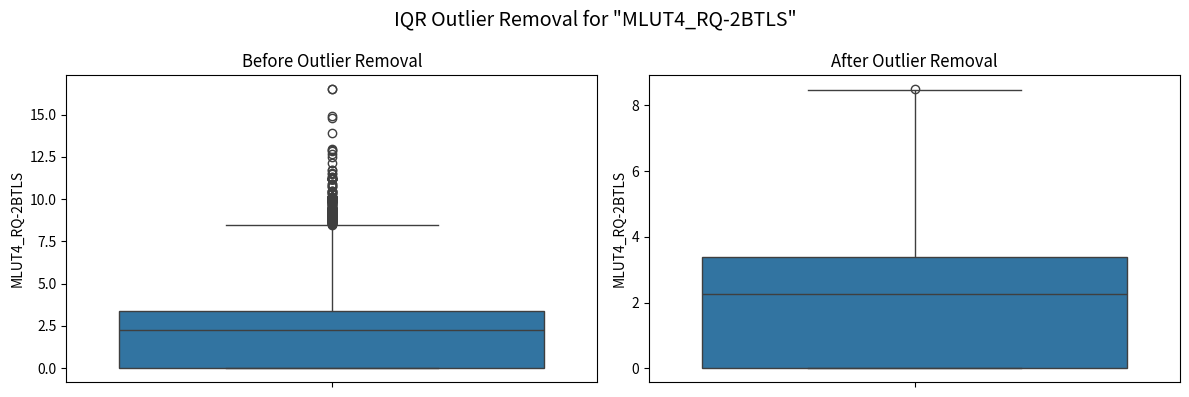

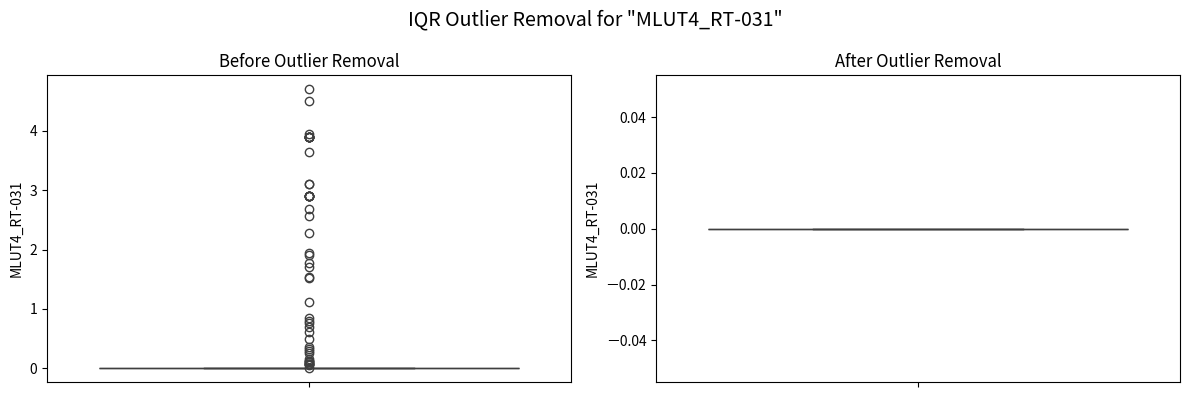

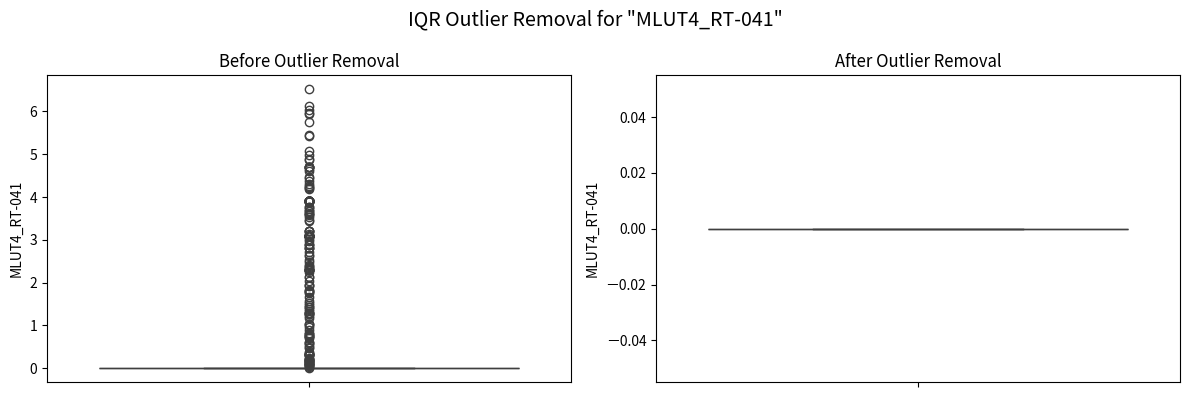

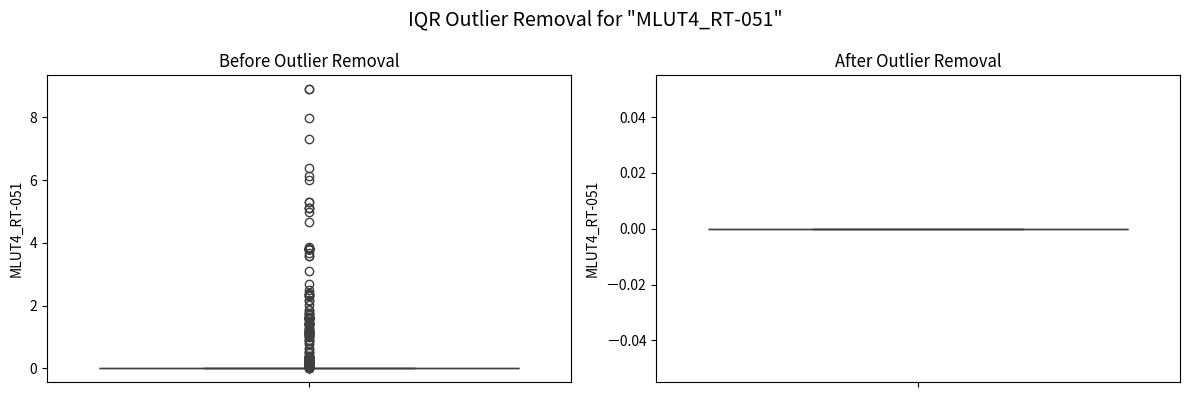

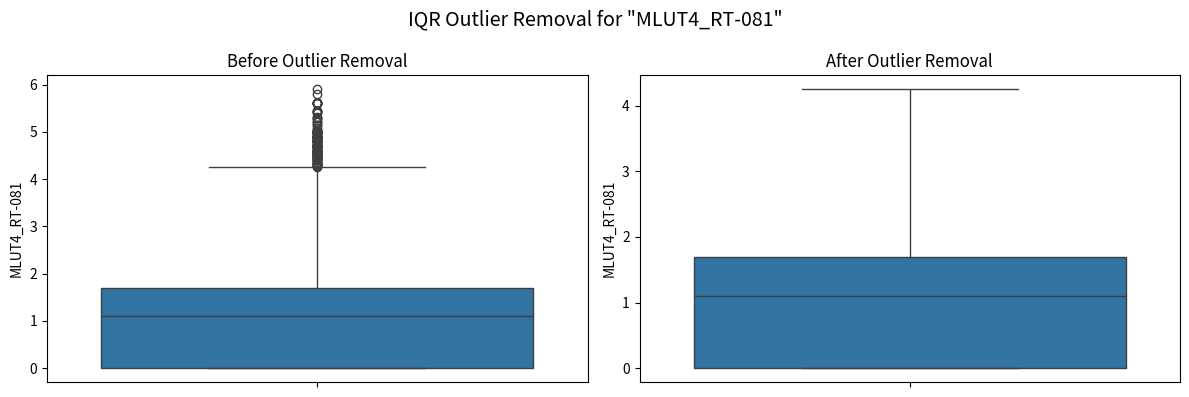

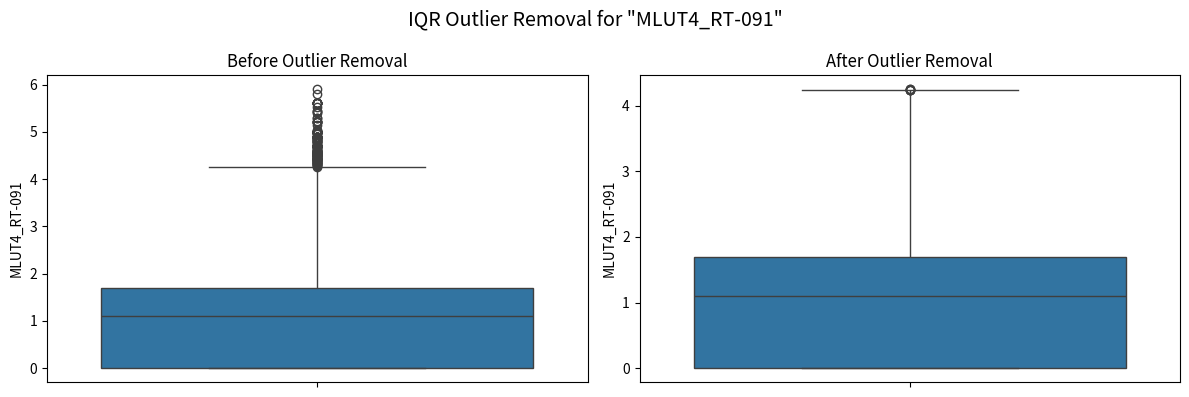

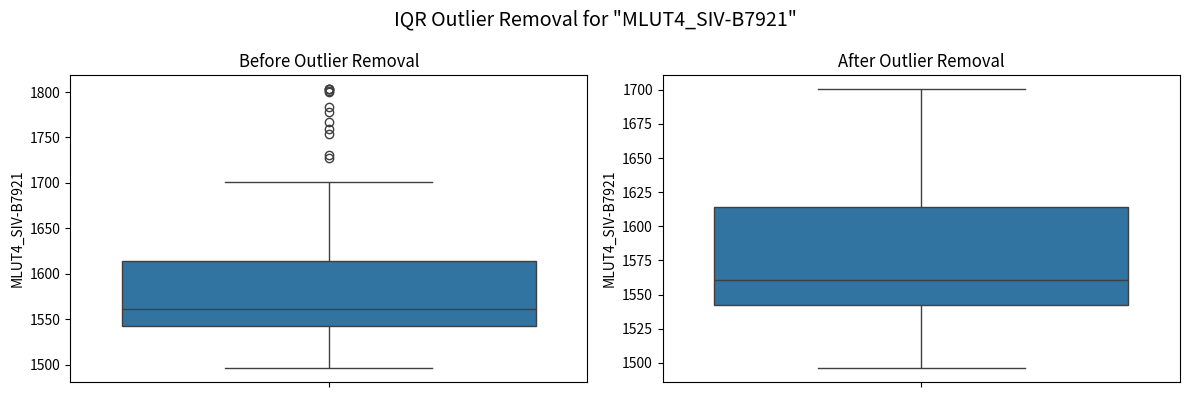

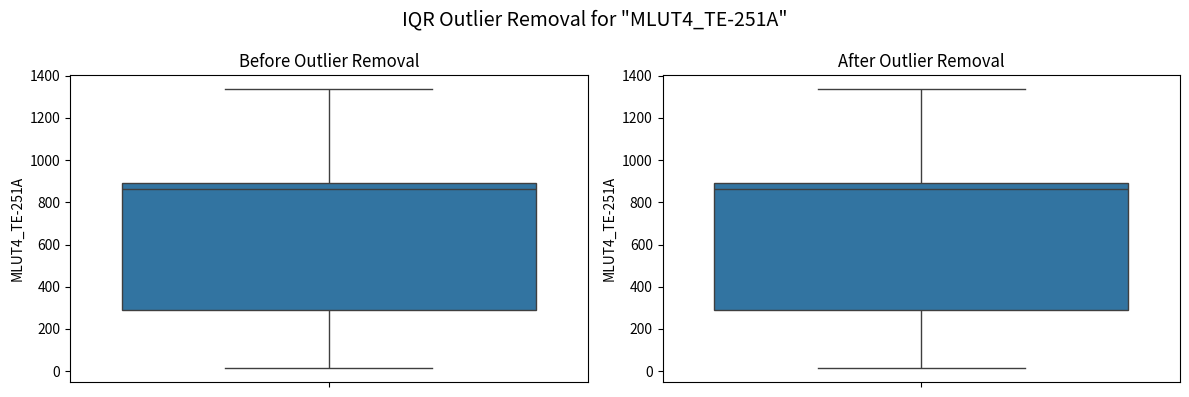

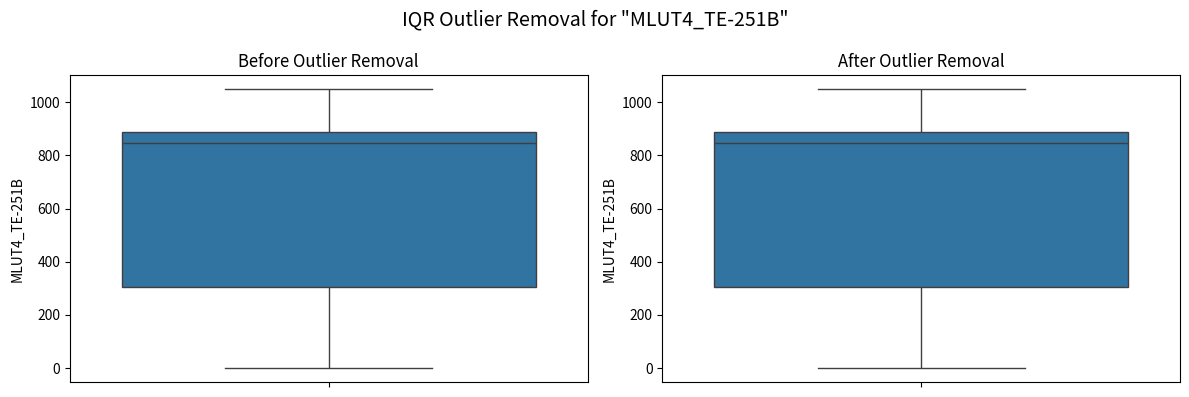

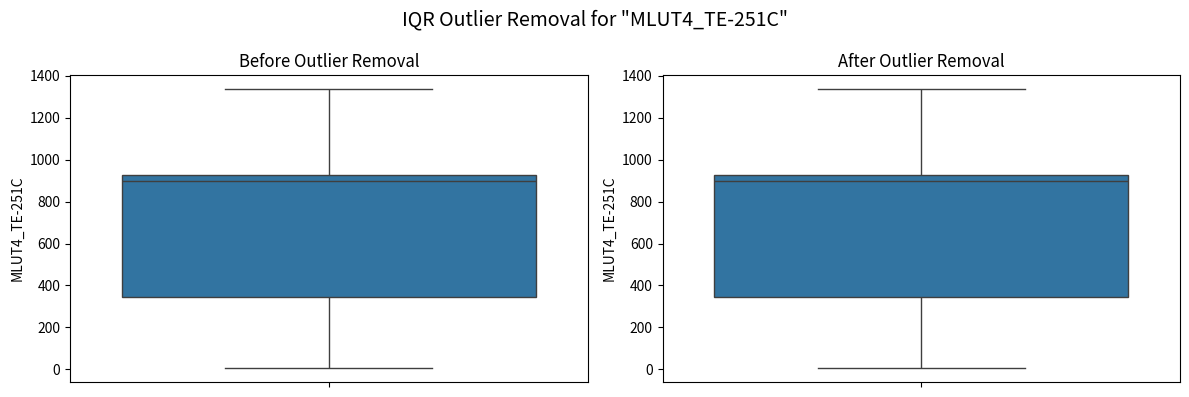

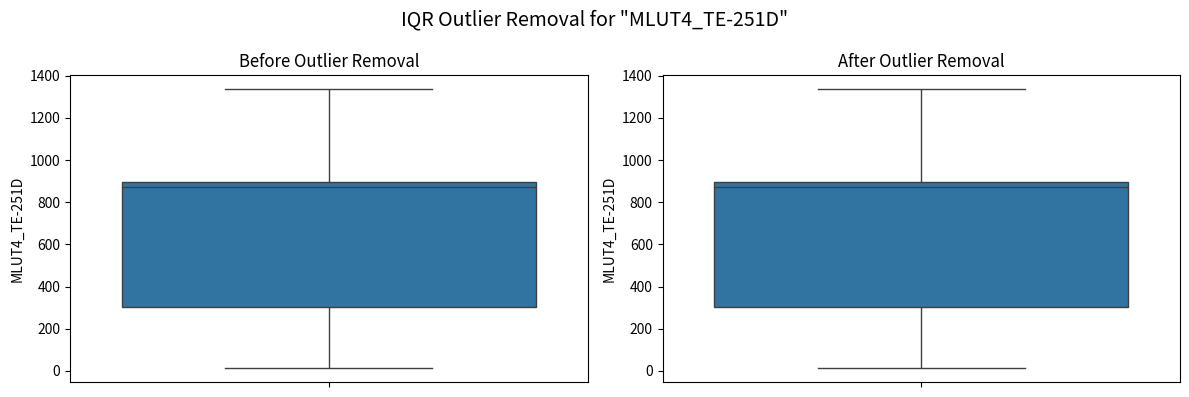

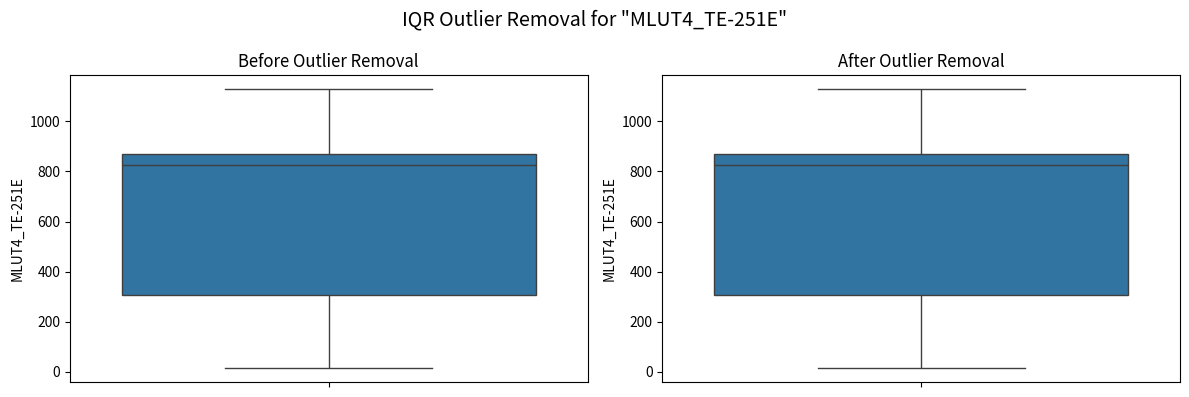

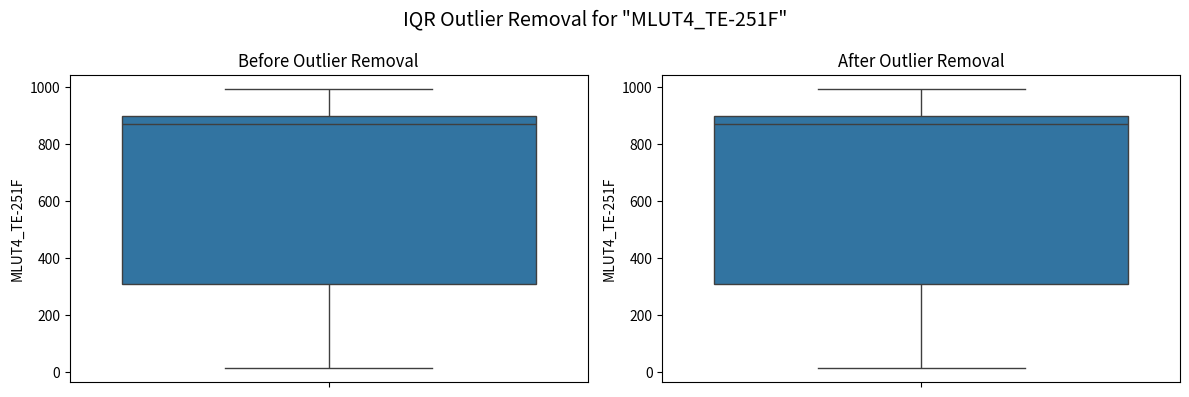

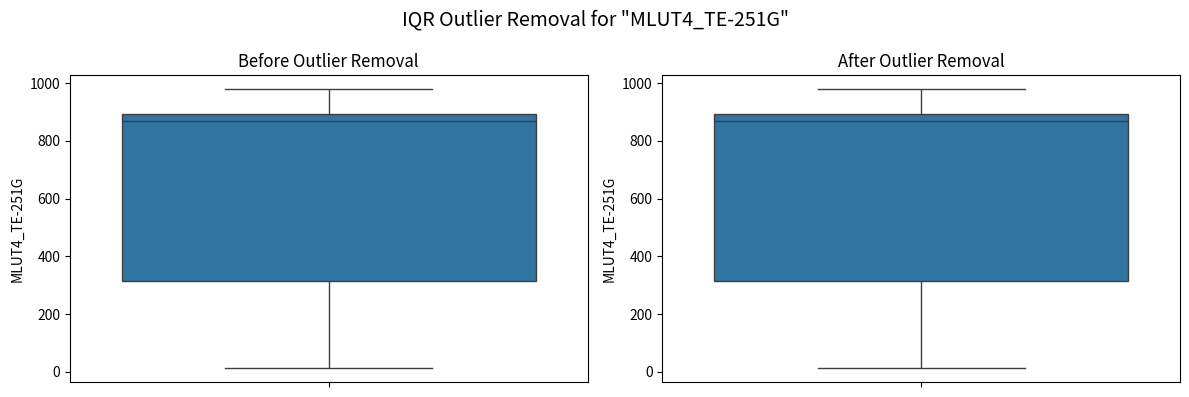

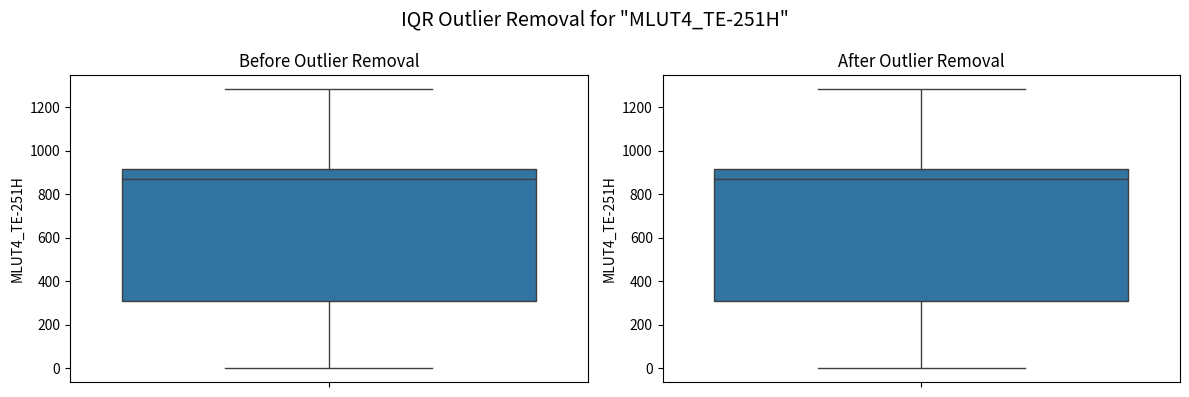

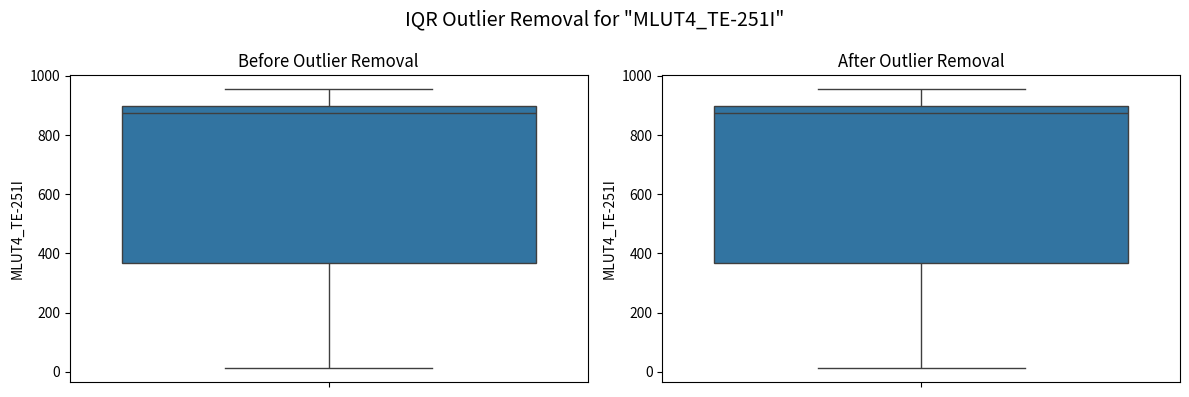

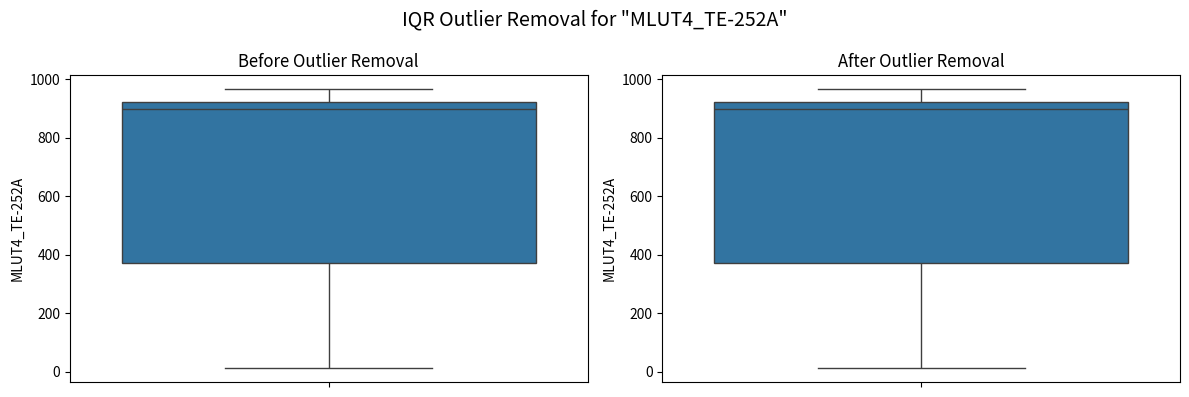

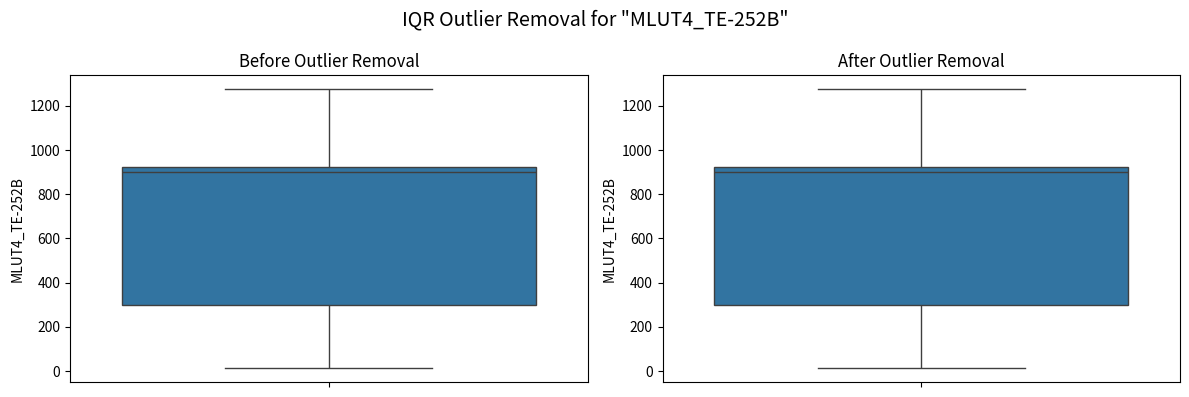

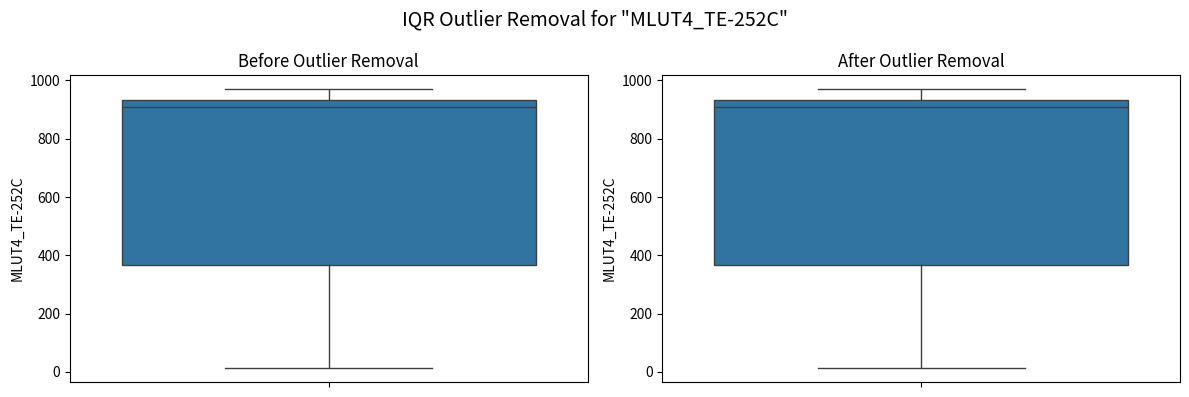

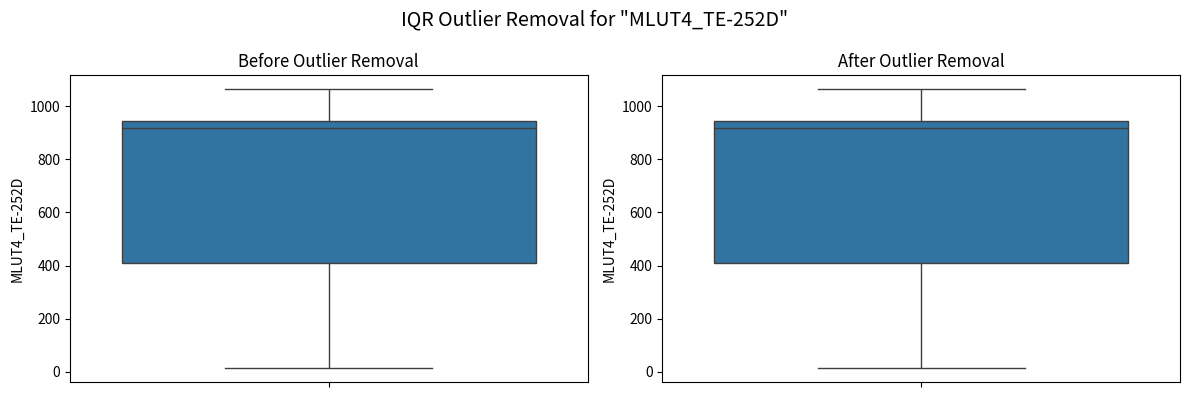

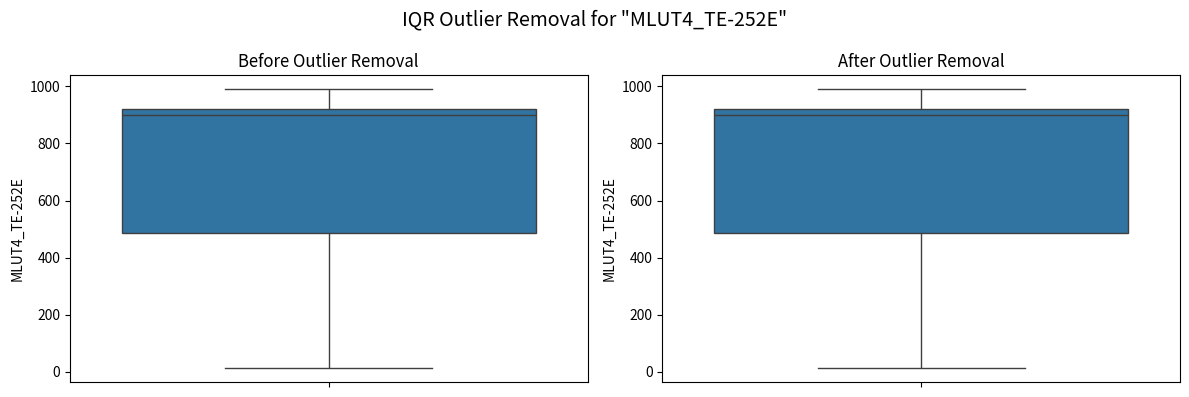

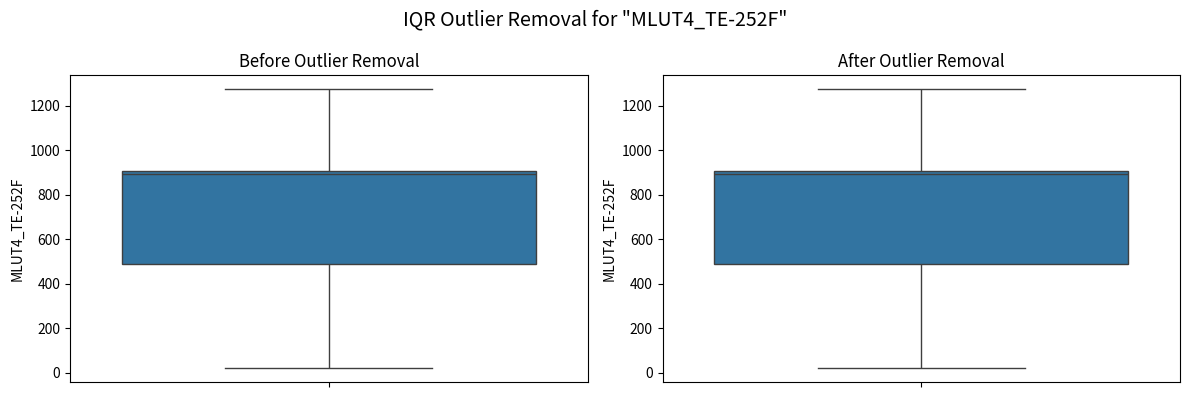

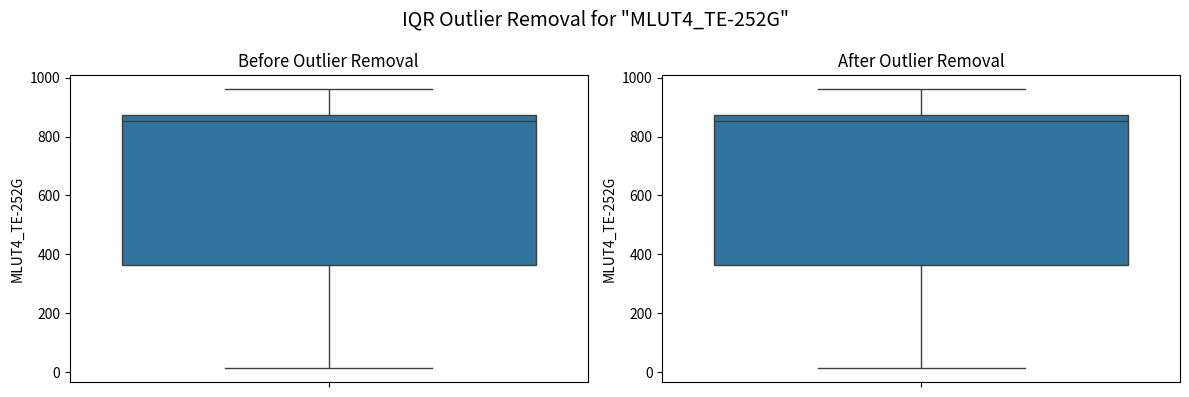

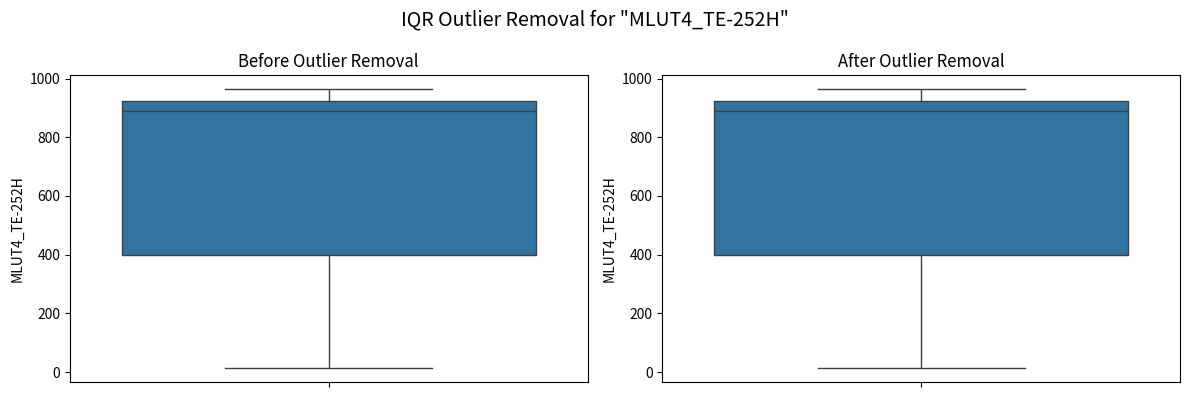

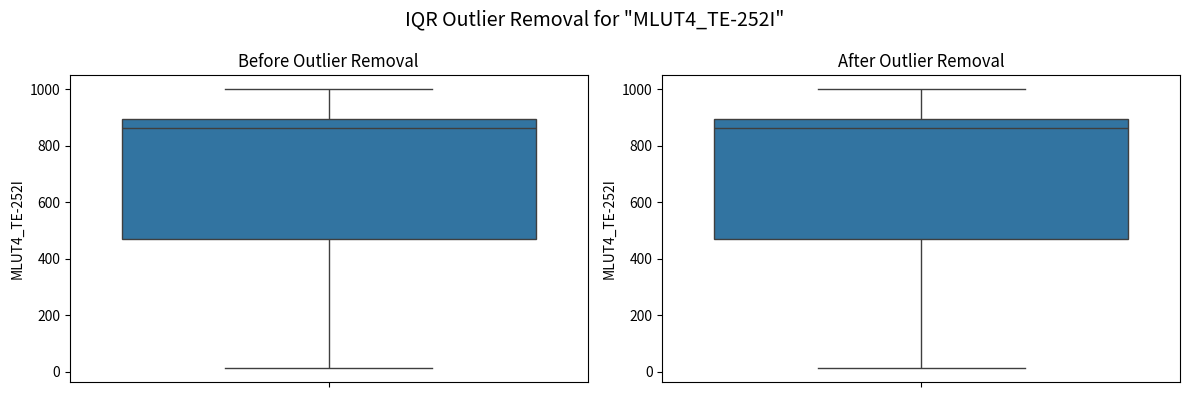

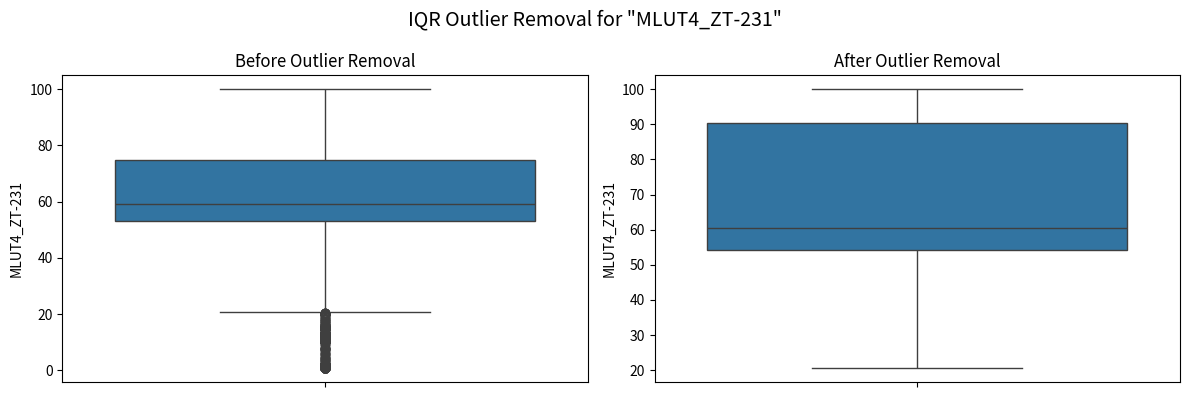

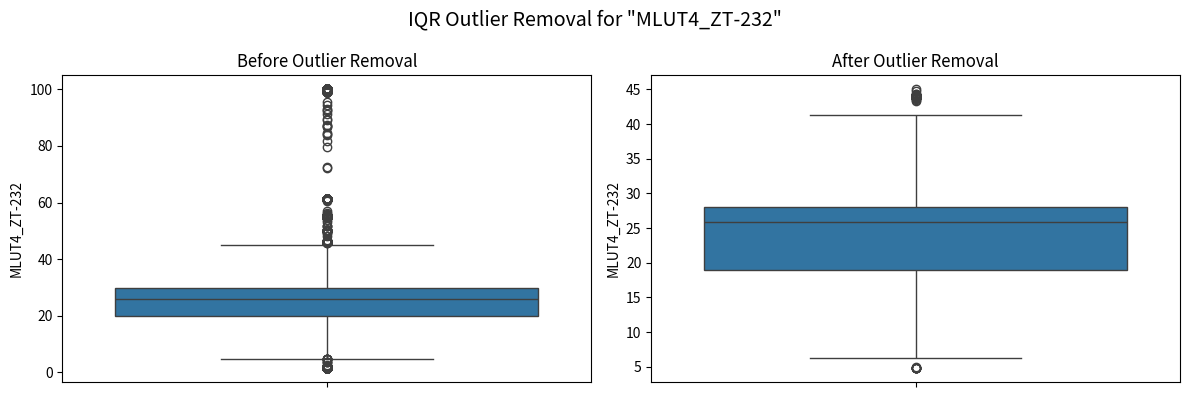

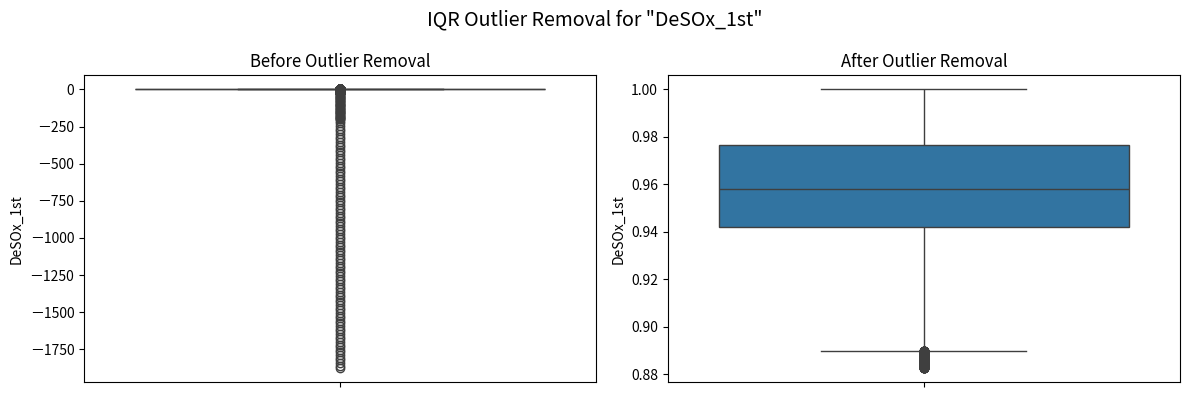

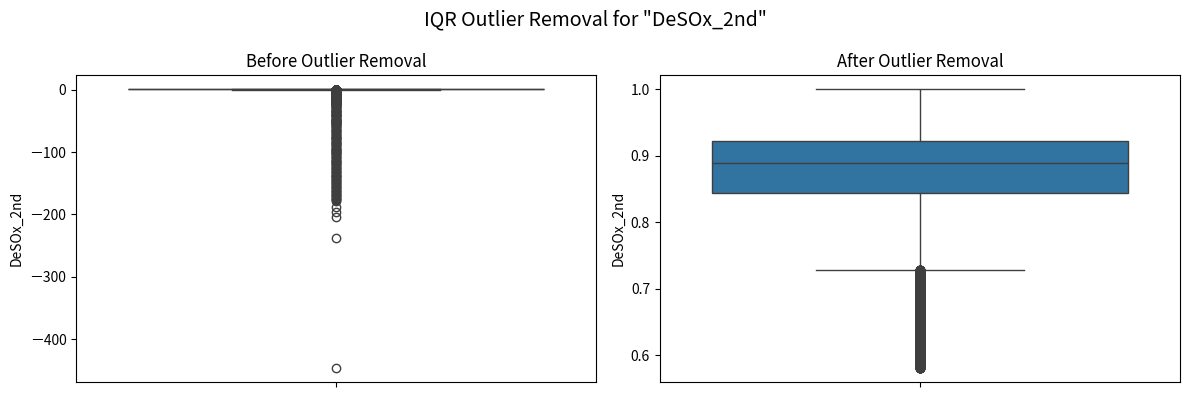

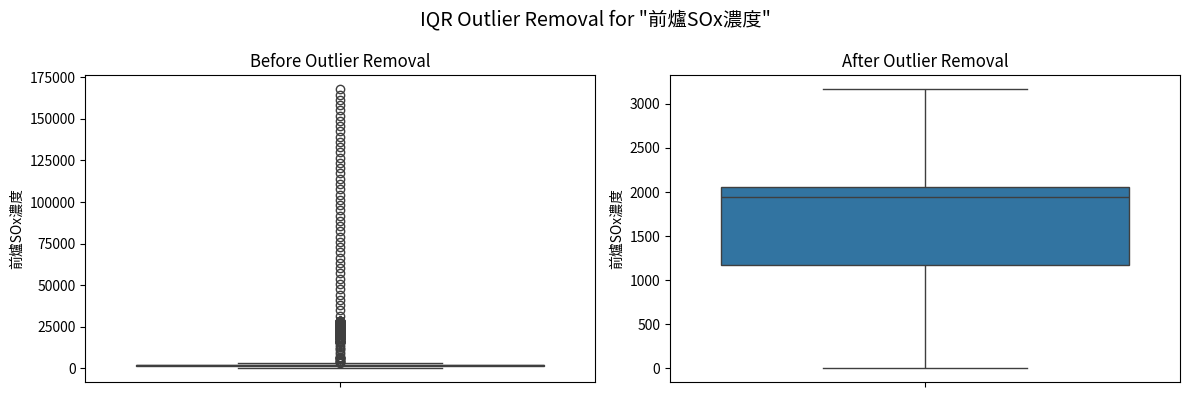

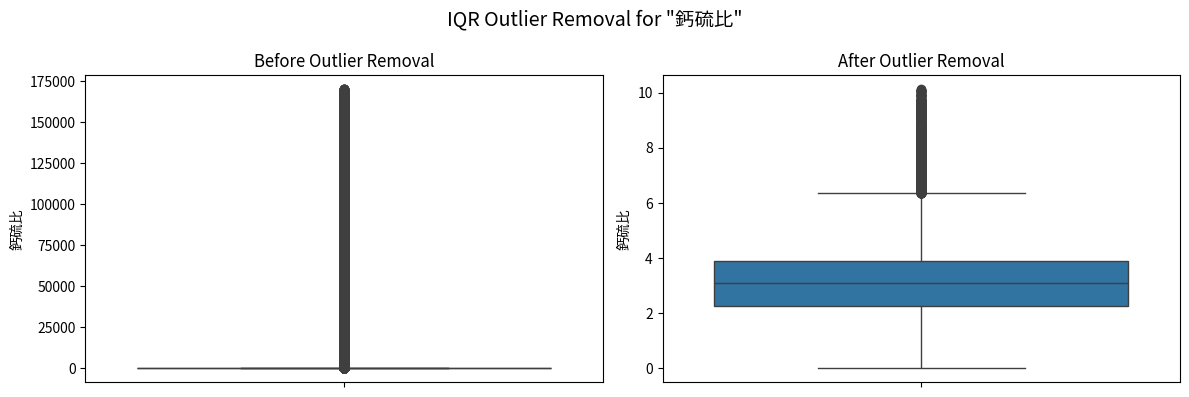

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_and_plot_iqr_outliers(df: pd.DataFrame, figsize=(12, 4)):
    """
    對 DataFrame 中每個數值欄位進行 IQR 離群值檢測，並繪製刪除離群值前與後的分布圖。

    參數：
    df : pd.DataFrame - 原始資料集
    figsize : tuple - 每個特徵的圖形大小

    回傳：
    pd.DataFrame - 移除離群值後的 DataFrame
    """
    numeric_cols = df.select_dtypes(include='number').columns
    cleaned_df = df.copy()

    for col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle(f'IQR Outlier Removal for "{col}"', fontsize=14)

        # 原始分布
        sns.boxplot(y=df[col], ax=axes[0])
        axes[0].set_title('Before Outlier Removal')

        # IQR 計算
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 移除離群值
        filtered_series = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

        # 移除後分布
        sns.boxplot(y=filtered_series, ax=axes[1])
        axes[1].set_title('After Outlier Removal')

        plt.tight_layout()
        plt.show()

    return cleaned_df

# 假設你有個 DataFrame df
cleaned_df = detect_and_plot_iqr_outliers(df_interp)